In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

# dit stuk is uit IFERC_ALL
def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
       
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
                      
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


Integral over Q for W7Xhms05 621.914 is: 60.6164959424759
Integral over E for W7Xhms05 621.914 is: 4.921177945986169
Integral over e for W7Xhms05 621.914 is: 7.780063565136814


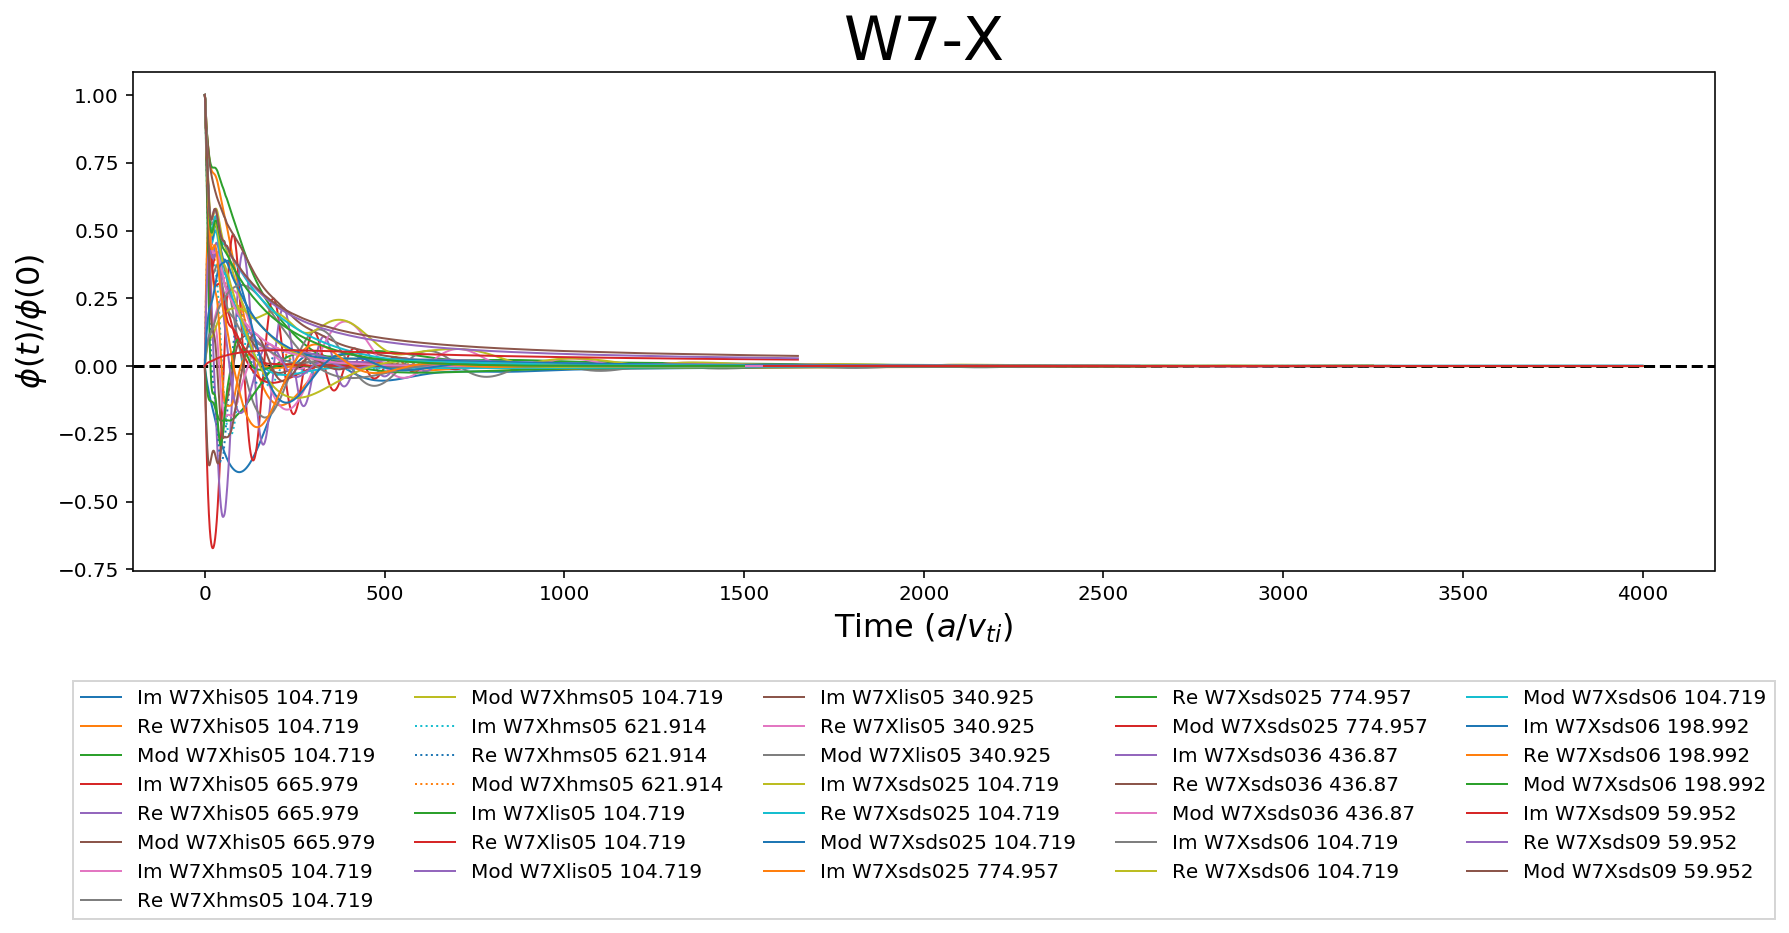

In [2]:
data1 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/104.719/gamdiagions_act.dat')
E1 = (data1[:,1]*(1/data1[0, 1]))
e1 = (data1[:,2]*(1/data1[0, 1]))
t1 = data1[:,0]

data2 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/665.979/gamdiagions_act.dat')
E2 = (data2[:,1]*(1/data2[0, 1]))
e2 = (data2[:,2]*(1/data2[0, 1]))
t2 = data2[:,0]

data3 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/104.719/gamdiagions_act.dat')
E3 = (data3[:,1]*(1/data3[0, 1]))
e3 = (data3[:,2]*(1/data3[0, 1]))
t3 = data3[:,0]

data4 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/621.914/gamdiagions_act.dat')
E4 = (data4[:,1]*(1/data4[0, 1]))
e4 = (data4[:,2]*(1/data4[0, 1]))
t4 = data4[:,0]

data5 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xlis05/GAM/104.719/gamdiagions_act.dat')
E5 = (data5[:,1]*(1/data5[0, 1]))
e5 = (data5[:,2]*(1/data5[0, 1]))
t5 = data5[:,0]

data6 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xlis05/GAM/340.925/gamdiagions_act.dat')
E6 = (data6[:,1]*(1/data6[0, 1]))
e6 = (data6[:,2]*(1/data6[0, 1]))
t6 = data6[:,0]

data7 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/104.719/gamdiagions_act.dat')
E7 = (data7[:,1]*(1/data7[0, 1]))
e7 = (data7[:,2]*(1/data7[0, 1]))
t7 = data7[:,0]

data8 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/774.957/gamdiagions_act.dat')
E8 = (data8[:,1]*(1/data8[0, 1]))
e8 = (data8[:,2]*(1/data8[0, 1]))
t8 = data8[:,0]

data9 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds036/GAM/436.87/gamdiagions_act.dat')
E9 = (data9[:,1]*(1/data9[0, 1]))
e9 = (data9[:,2]*(1/data9[0, 1]))
t9 = data9[:,0]

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#data10 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds05/GAM/104.719/gamdiagions_act.dat')
#E10 = (data10[:,1]*(1/data10[0, 1]))
#e10 = (data10[:,2]*(1/data10[0, 1]))
#t10 = data10[:,0]
#
#data11 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds05/GAM/621.914/gamdiagions_act.dat')
#E11 = (data11[:,1]*(1/data11[0, 1]))
#e11 = (data11[:,2]*(1/data11[0, 1]))
#t11 = data11[:,0]

data12 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds06/GAM/104.719/gamdiagions_act.dat')
E12 = (data12[:,1]*(1/data12[0, 1]))
e12 = (data12[:,2]*(1/data12[0, 1]))
t12 = data12[:,0]

data13 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds06/GAM/198.992/gamdiagions_act.dat')
E13 = (data13[:,1]*(1/data13[0, 1]))
e13 = (data13[:,2]*(1/data13[0, 1]))
t13 = data13[:,0]

data14 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds09/GAM/59.952/gamdiagions_act.dat')
E14 = (data14[:,1]*(1/data14[0, 1]))
e14 = (data14[:,2]*(1/data14[0, 1]))
t14 = data14[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
#plt.ylim([0,0.1])

Q1 = np.sqrt(E1**2+e1**2)
ax1.plot(t1, e1, linewidth=1, label=('Im W7Xhis05 104.719'))
ax1.plot(t1, E1, linewidth=1, label=('Re W7Xhis05 104.719'))
ax1.plot(t1, Q1, linewidth=1, label=('Mod W7Xhis05 104.719'))

Q2 = np.sqrt(E2**2+e2**2)
ax1.plot(t2, e2, linewidth=1, label=('Im W7Xhis05 665.979'))
ax1.plot(t2, E2, linewidth=1, label=('Re W7Xhis05 665.979'))
ax1.plot(t2, Q2, linewidth=1, label=('Mod W7Xhis05 665.979'))

Q3 = np.sqrt(E3**2+e3**2)
ax1.plot(t3, e3, linewidth=1, label=('Im W7Xhms05 104.719'))
ax1.plot(t3, E3, linewidth=1, label=('Re W7Xhms05 104.719'))
ax1.plot(t3, Q3, linewidth=1, label=('Mod W7Xhms05 104.719'))

Q4 = np.sqrt(E4**2+e4**2)
ax1.plot(t4, e4, linewidth=1, label=('Im W7Xhms05 621.914'),linestyle='dotted')
ax1.plot(t4, E4, linewidth=1, label=('Re W7Xhms05 621.914'),linestyle='dotted')
ax1.plot(t4, Q4, linewidth=1, label=('Mod W7Xhms05 621.914'),linestyle='dotted')

Q5 = np.sqrt(E5**2+e5**2)
ax1.plot(t5, e5, linewidth=1, label=('Im W7Xlis05 104.719'))
ax1.plot(t5, E5, linewidth=1, label=('Re W7Xlis05 104.719'))
ax1.plot(t5, Q5, linewidth=1, label=('Mod W7Xlis05 104.719'))

Q6 = np.sqrt(E6**2+e6**2)
ax1.plot(t6, e6, linewidth=1, label=('Im W7Xlis05 340.925'))
ax1.plot(t6, E6, linewidth=1, label=('Re W7Xlis05 340.925'))
ax1.plot(t6, Q6, linewidth=1, label=('Mod W7Xlis05 340.925'))

Q7 = np.sqrt(E7**2+e7**2)
ax1.plot(t7, e7, linewidth=1, label=('Im W7Xsds025 104.719'))
ax1.plot(t7, E7, linewidth=1, label=('Re W7Xsds025 104.719'))
ax1.plot(t7, Q7, linewidth=1, label=('Mod W7Xsds025 104.719'))

Q8 = np.sqrt(E8**2+e8**2)
ax1.plot(t8, e8, linewidth=1, label=('Im W7Xsds025 774.957'))
ax1.plot(t8, E8, linewidth=1, label=('Re W7Xsds025 774.957'))
ax1.plot(t8, Q8, linewidth=1, label=('Mod W7Xsds025 774.957'))

Q9 = np.sqrt(E9**2+e9**2)
ax1.plot(t9, e9, linewidth=1, label=('Im W7Xsds036 436.87'))
ax1.plot(t9, E9, linewidth=1, label=('Re W7Xsds036 436.87'))
ax1.plot(t9, Q9, linewidth=1, label=('Mod W7Xsds036 436.87'))

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#Q10 = np.sqrt(E10**2+e10**2)
#ax1.plot(t10, e10, linewidth=1, label=('Im W7Xsds05 104.719'))
#ax1.plot(t10, E10, linewidth=1, label=('Re W7Xsds05 104.719'))
#ax1.plot(t10, Q10, linewidth=1, label=('Mod W7Xsds05 104.719'))
#
#Q11 = np.sqrt(E11**2+e11**2)
#ax1.plot(t11, e11, linewidth=1, label=('Im W7Xsds05 621.914'),linestyle='dashed')
#ax1.plot(t11, E11, linewidth=1, label=('Re W7Xsds05 621.914'),linestyle='dashed')
#ax1.plot(t11, Q11, linewidth=1, label=('Mod W7Xsds05 621.914'),linestyle='dashed')

Q12 = np.sqrt(E12**2+e12**2)
ax1.plot(t12, e12, linewidth=1, label=('Im W7Xsds06 104.719'))
ax1.plot(t12, E12, linewidth=1, label=('Re W7Xsds06 104.719'))
ax1.plot(t12, Q12, linewidth=1, label=('Mod W7Xsds06 104.719'))

Q13 = np.sqrt(E13**2+e13**2)
ax1.plot(t13, e13, linewidth=1, label=('Im W7Xsds06 198.992'))
ax1.plot(t13, E13, linewidth=1, label=('Re W7Xsds06 198.992'))
ax1.plot(t13, Q13, linewidth=1, label=('Mod W7Xsds06 198.992'))

Q14 = np.sqrt(E14**2+e14**2)
ax1.plot(t14, e14, linewidth=1, label=('Im W7Xsds09 59.952'))
ax1.plot(t14, E14, linewidth=1, label=('Re W7Xsds09 59.952'))
ax1.plot(t14, Q14, linewidth=1, label=('Mod W7Xsds09 59.952'))

plt.legend(loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=5)

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ11 = (np.trapz(Q1,t1))
integ12 = (np.trapz(E1,t1))
integ13 = (np.trapz(e1,t1))
integ21 = (np.trapz(Q2,t2))
integ22 = (np.trapz(E2,t2))
integ23 = (np.trapz(e2,t2))
integ31 = (np.trapz(Q3,t3))
integ32 = (np.trapz(E3,t3))
integ33 = (np.trapz(e3,t3))
integ41 = (np.trapz(Q4,t4))
integ42 = (np.trapz(E4,t4))
integ43 = (np.trapz(e4,t4))
integ51 = (np.trapz(Q5,t5))
integ52 = (np.trapz(E5,t5))
integ53 = (np.trapz(e5,t5))
integ61 = (np.trapz(Q6,t6))
integ62 = (np.trapz(E6,t6))
integ63 = (np.trapz(e6,t6))
integ71 = (np.trapz(Q7,t7))
integ72 = (np.trapz(E7,t7))
integ73 = (np.trapz(e7,t7))
integ81 = (np.trapz(Q8,t8))
integ82 = (np.trapz(E8,t8))
integ83 = (np.trapz(e8,t8))
integ91 = (np.trapz(Q9,t9))
integ92 = (np.trapz(E9,t9))
integ93 = (np.trapz(e9,t9))
#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#integ101 = (np.trapz(Q10,t10))
#integ102 = (np.trapz(E10,t10))
#integ103 = (np.trapz(e10,t10))
#integ111 = (np.trapz(Q11,t11))
#integ112 = (np.trapz(E11,t11))
#integ113 = (np.trapz(e11,t11))
integ121 = (np.trapz(Q12,t12))
integ122 = (np.trapz(E12,t12))
integ123 = (np.trapz(e12,t12))
integ131 = (np.trapz(Q13,t13))
integ132 = (np.trapz(E13,t13))
integ133 = (np.trapz(e13,t13))
integ141 = (np.trapz(Q14,t14))
integ142 = (np.trapz(E14,t14))
integ143 = (np.trapz(e14,t14))

#print("Integral over Q for W7Xhis05 104.719 is:", integ11)
#print("Integral over Q for W7Xhis05 665.979 is:", integ21)
#print("Integral over Q for W7Xhms05 104.719 is:", integ31)
print("Integral over Q for W7Xhms05 621.914 is:", integ41)
#print("Integral over Q for W7Xlis05 104.719 is:", integ51)
#print("Integral over Q for W7Xlis05 340.925 is:", integ61)
#print("Integral over Q for W7Xsds025 104.719 is:", integ71)
#print("Integral over Q for W7Xsds025 774.957 is:", integ81)
#print("Integral over Q for W7Xsds036 436.87 is:", integ91)

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#print("Integral over Q for W7Xsds05 104.719 is:", integ101)
#print("Integral over Q for W7Xsds05 621.914 is:", integ111)

#print("Integral over Q for W7Xsds06 104.719 is:", integ121)
#print("Integral over Q for W7Xsds06 198.992 is:", integ131)
#print("Integral over Q for W7Xsds09 59.952 is:", integ141)

#print("Integral over E for W7Xhis05 104.719 is:", integ12)
#print("Integral over E for W7Xhis05 665.979 is:", integ22)
#print("Integral over E for W7Xhms05 104.719 is:", integ32)
print("Integral over E for W7Xhms05 621.914 is:", integ42)
#print("Integral over E for W7Xlis05 104.719 is:", integ52)
#print("Integral over E for W7Xlis05 340.925 is:", integ62)
#print("Integral over E for W7Xsds025 104.719 is:", integ72)
#print("Integral over E for W7Xsds025 774.957 is:", integ82)
#print("Integral over E for W7Xsds036 436.87 is:", integ92)

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#print("Integral over E for W7Xsds05 104.719 is:", integ102)
#print("Integral over E for W7Xsds05 621.914 is:", integ112)

#print("Integral over E for W7Xsds06 104.719 is:", integ122)
#print("Integral over E for W7Xsds06 198.992 is:", integ132)
#print("Integral over E for W7Xsds09 59.952 is:", integ142)

#print("Integral over e for W7Xhis05 104.719 is:", integ13)
#print("Integral over e for W7Xhis05 665.979 is:", integ23)
#print("Integral over e for W7Xhms05 104.719 is:", integ33)
print("Integral over e for W7Xhms05 621.914 is:", integ43)
#print("Integral over e for W7Xlis05 104.719 is:", integ53)
#print("Integral over e for W7Xlis05 340.925 is:", integ63)
#print("Integral over e for W7Xsds025 104.719 is:", integ73)
#print("Integral over e for W7Xsds025 774.957 is:", integ83)
#print("Integral over e for W7Xsds036 436.87 is:", integ93)

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#print("Integral over e for W7Xsds05 104.719 is:", integ103)
#print("Integral over e for W7Xsds05 621.914 is:", integ113)

#print("Integral over e for W7Xsds06 104.719 is:", integ123)
#print("Integral over e for W7Xsds06 198.992 is:", integ133)
#print("Integral over e for W7Xsds09 59.952 is:", integ143)

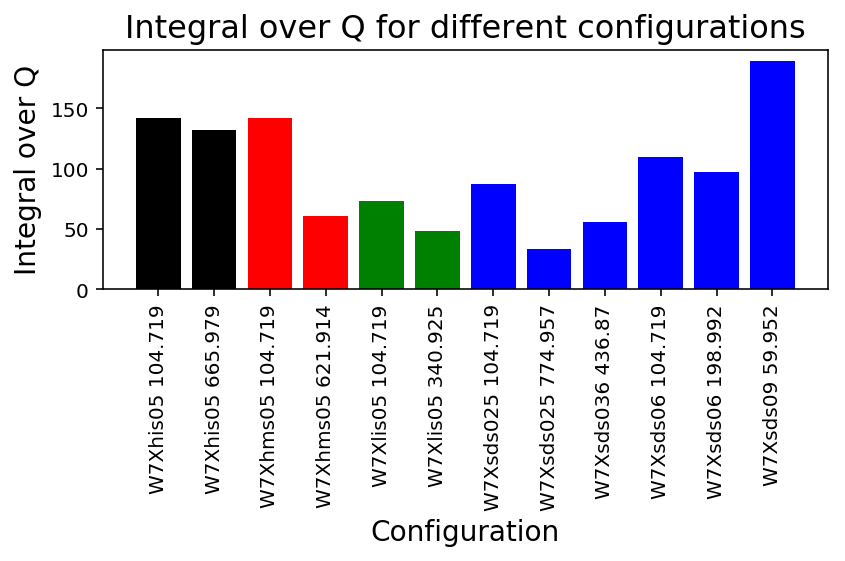

In [28]:
#,integ101,integ111 en ,'blue','blue' en ,'W7Xsds05 104.719','W7Xsds05 621.914' verwijderd want die data klopt niet voor sds05 want het is de data van hms05. en 14 naar 12 veranderd!
histogramQ = np.arange(12)
plt.bar(histogramQ, height= [integ11,integ21,integ31,integ41,integ51,integ61,integ71,integ81,integ91,integ121,integ131,integ141], color=['black','black', 'red', 'red', 'green','green', 'blue', 'blue','blue','blue','blue','blue']) 
plt.xticks(histogramQ, ['W7Xhis05 104.719','W7Xhis05 665.979','W7Xhms05 104.719','W7Xhms05 621.914','W7Xlis05 104.719','W7Xlis05 340.925','W7Xsds025 104.719','W7Xsds025 774.957','W7Xsds036 436.87','W7Xsds06 104.719','W7Xsds06 198.992','W7Xsds09 59.952'],rotation=90)
plt.title('Integral over Q for different configurations', fontsize=16)
plt.xlabel('Configuration',fontsize=14)
plt.ylabel('Integral over Q',fontsize=14)
#plt.bar.axhline(y=0, color='black', linestyle='dashed')
plt.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/barplotmodulus.pdf', format='pdf', dpi=1200)

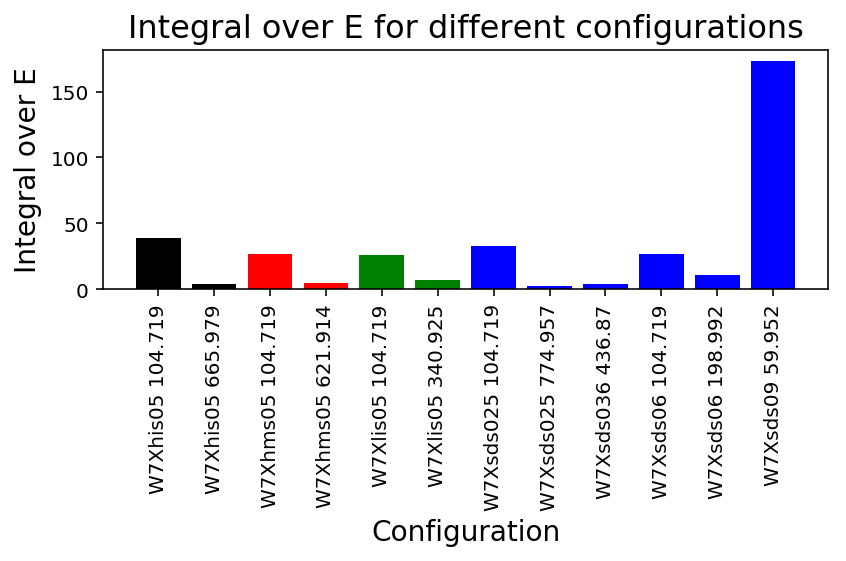

In [29]:
#,integ102,integ112 en 'blue','blue', en 'W7Xsds05 104.719','W7Xsds05 621.914', verwijderd want die data klopt niet voor sds05 want het is de data van hms05. en 14 naar 12 veranderd!
histogramE = np.arange(12)
plt.bar(histogramE, height= [integ12,integ22,integ32,integ42,integ52,integ62,integ72,integ82,integ92,integ122,integ132,integ142],color=['black','black', 'red', 'red', 'green','green', 'blue', 'blue','blue','blue','blue','blue']) 
plt.xticks(histogramE, ['W7Xhis05 104.719','W7Xhis05 665.979','W7Xhms05 104.719','W7Xhms05 621.914','W7Xlis05 104.719','W7Xlis05 340.925','W7Xsds025 104.719','W7Xsds025 774.957','W7Xsds036 436.87','W7Xsds06 104.719','W7Xsds06 198.992','W7Xsds09 59.952'],rotation=90)
plt.title('Integral over E for different configurations', fontsize=16)
plt.xlabel('Configuration',fontsize=14)
plt.ylabel('Integral over E',fontsize=14)
plt.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/barplotreal.pdf', format='pdf', dpi=1200)

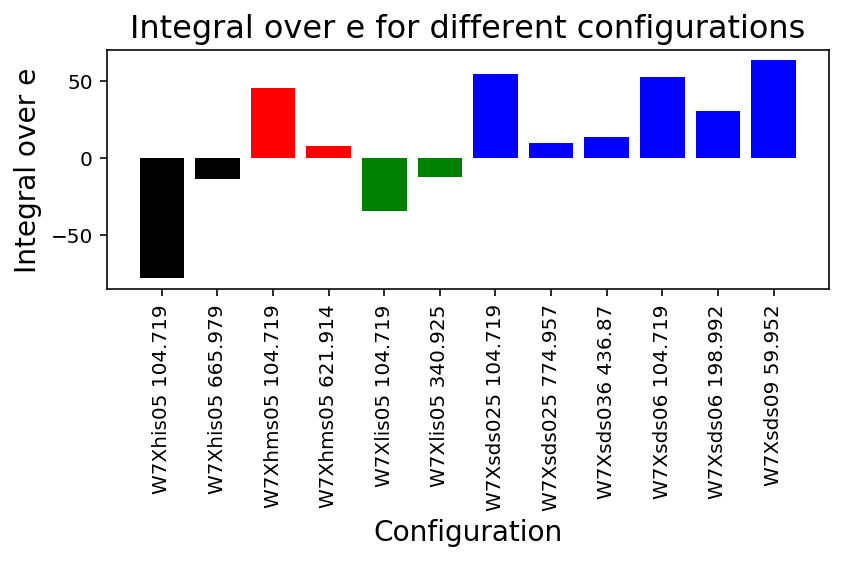

In [30]:
#,integ103,integ113 en ,'blue','blue' en 'W7Xsds05 104.719','W7Xsds05 621.914', verwijderd want die data klopt niet voor sds05 want het is de data van hms05. en 14 naar 12 veranderd!
histograme = np.arange(12)
plt.bar(histograme, height= [integ13,integ23,integ33,integ43,integ53,integ63,integ73,integ83,integ93,integ123,integ133,integ143],color=['black','black', 'red', 'red', 'green','green', 'blue', 'blue','blue','blue','blue','blue']) 
plt.xticks(histograme, ['W7Xhis05 104.719','W7Xhis05 665.979','W7Xhms05 104.719','W7Xhms05 621.914','W7Xlis05 104.719','W7Xlis05 340.925','W7Xsds025 104.719','W7Xsds025 774.957','W7Xsds036 436.87','W7Xsds06 104.719','W7Xsds06 198.992','W7Xsds09 59.952'],rotation=90)
plt.title('Integral over e for different configurations', fontsize=16)
plt.xlabel('Configuration',fontsize=14)
plt.ylabel('Integral over e',fontsize=14)
plt.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/barplotimaginair.pdf', format='pdf', dpi=1200)

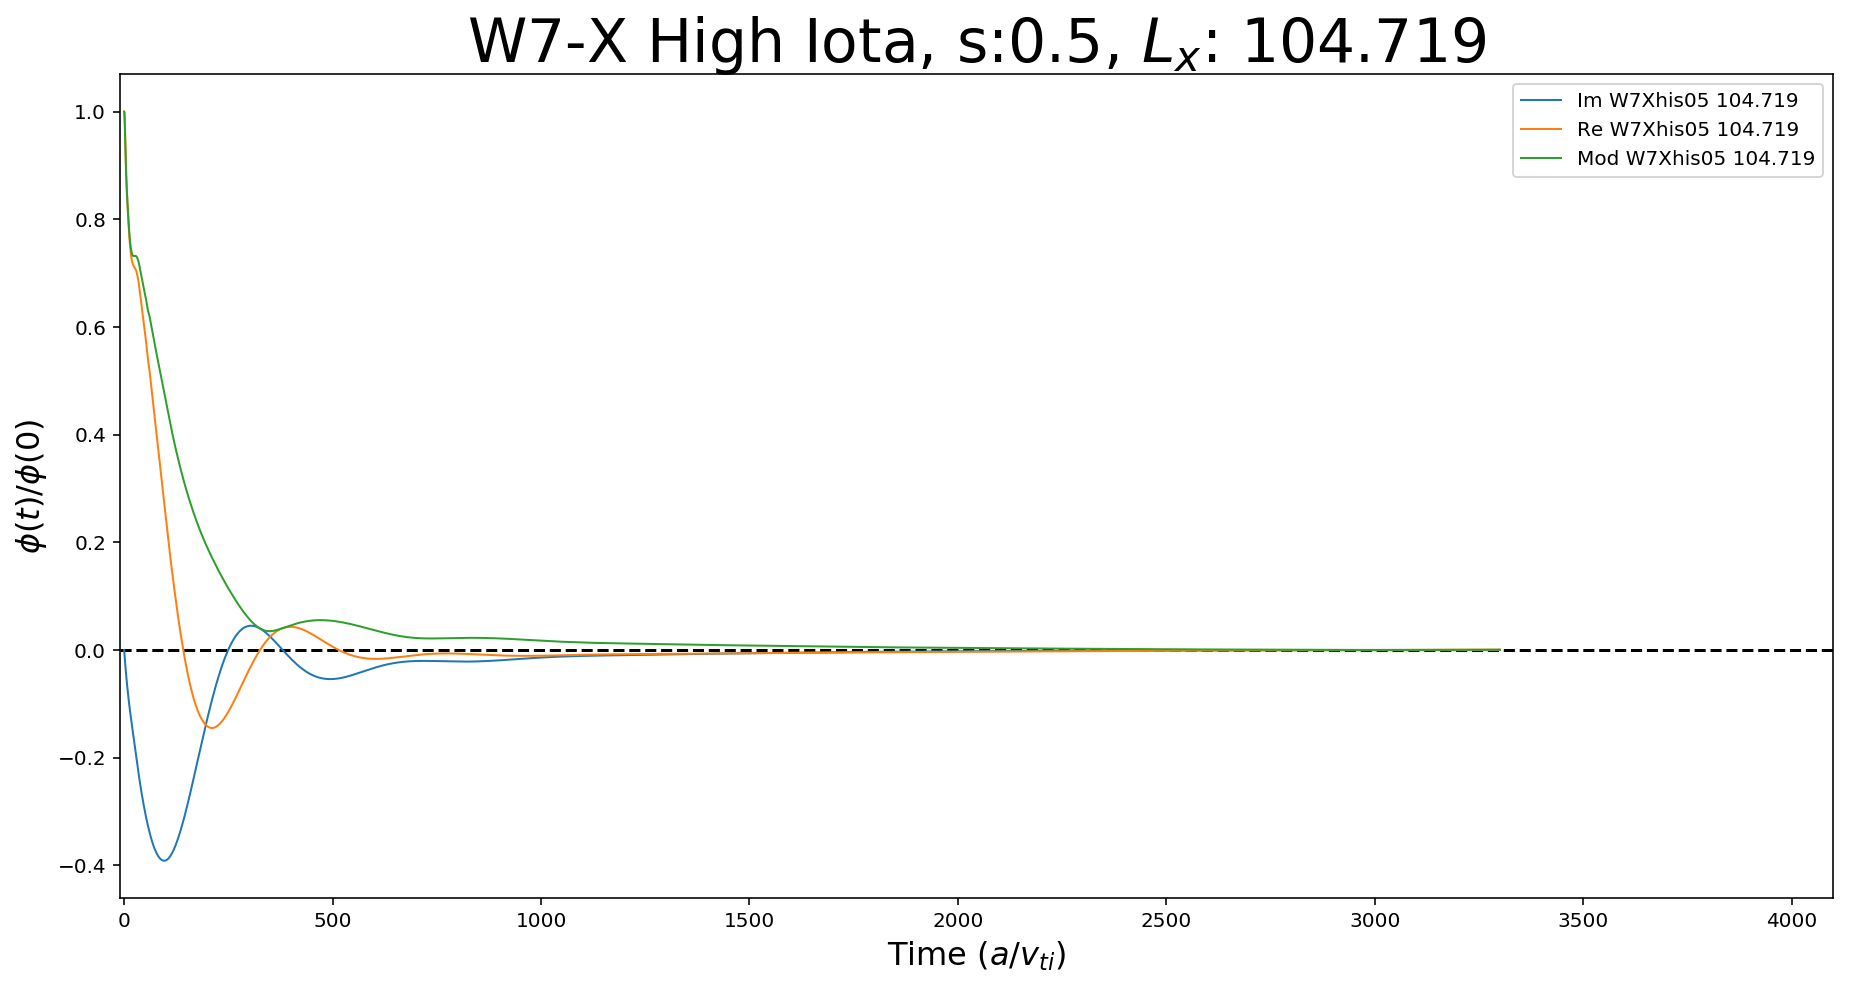

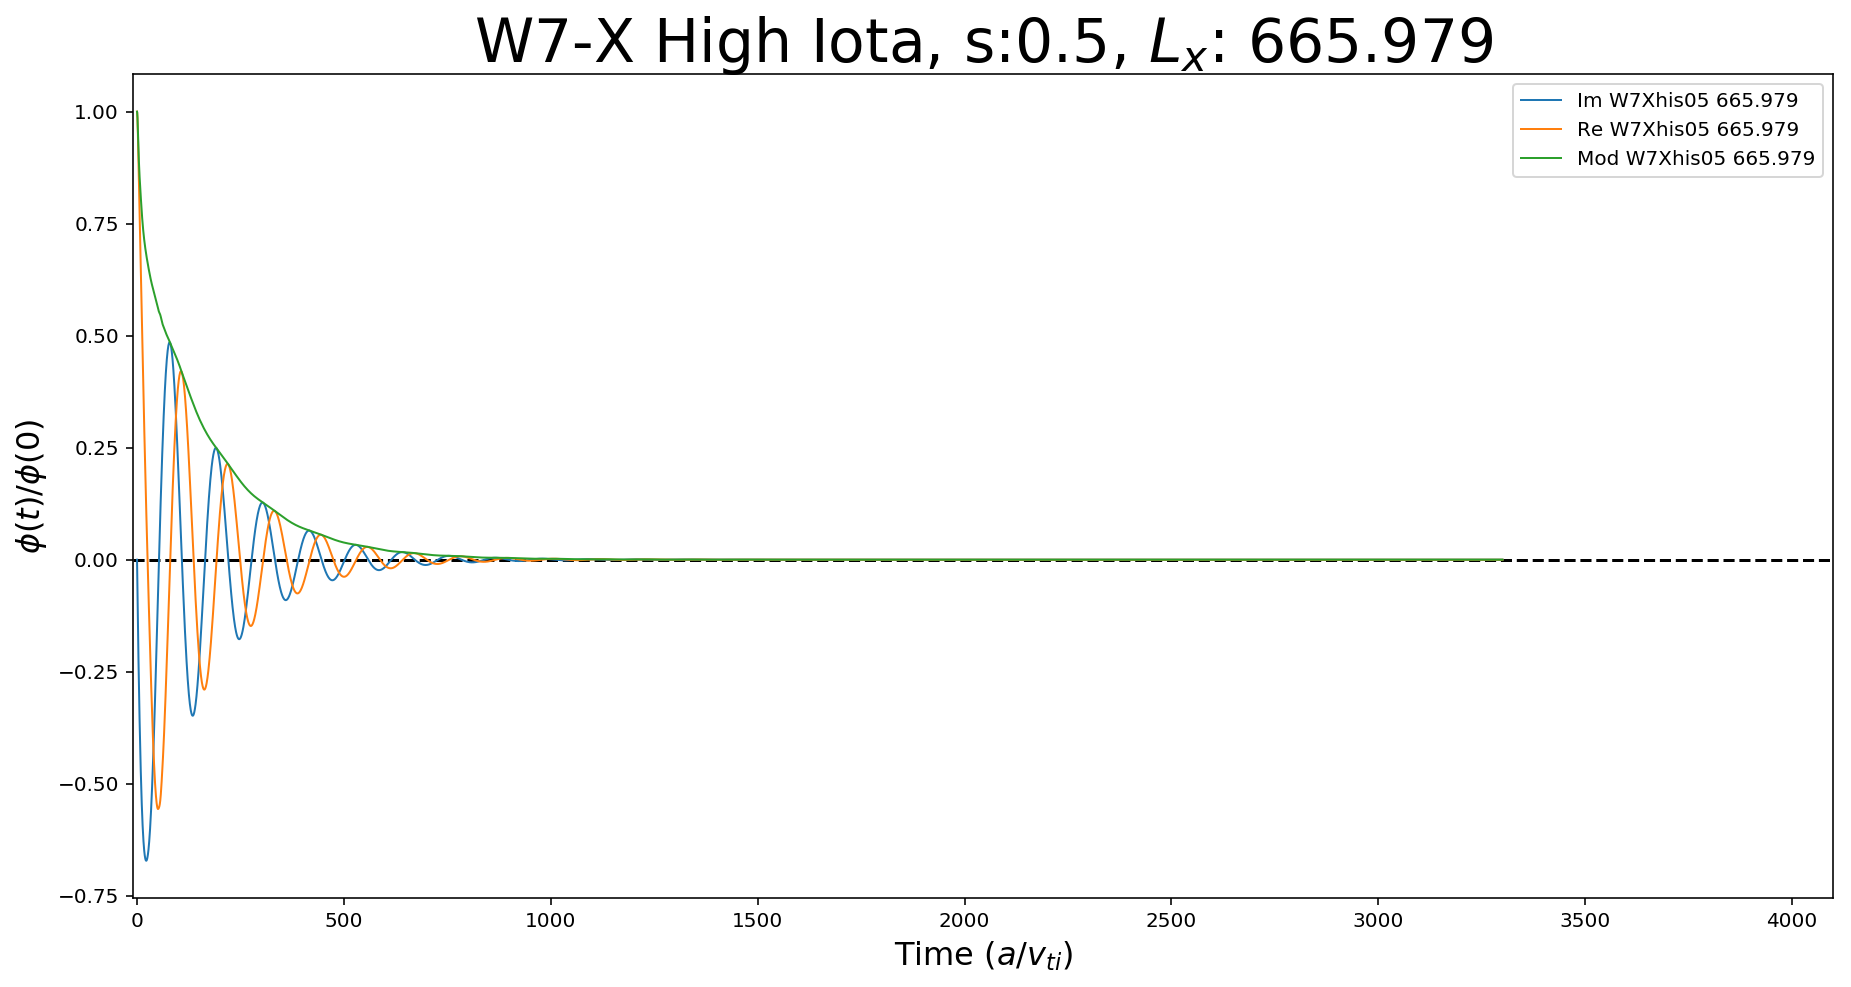

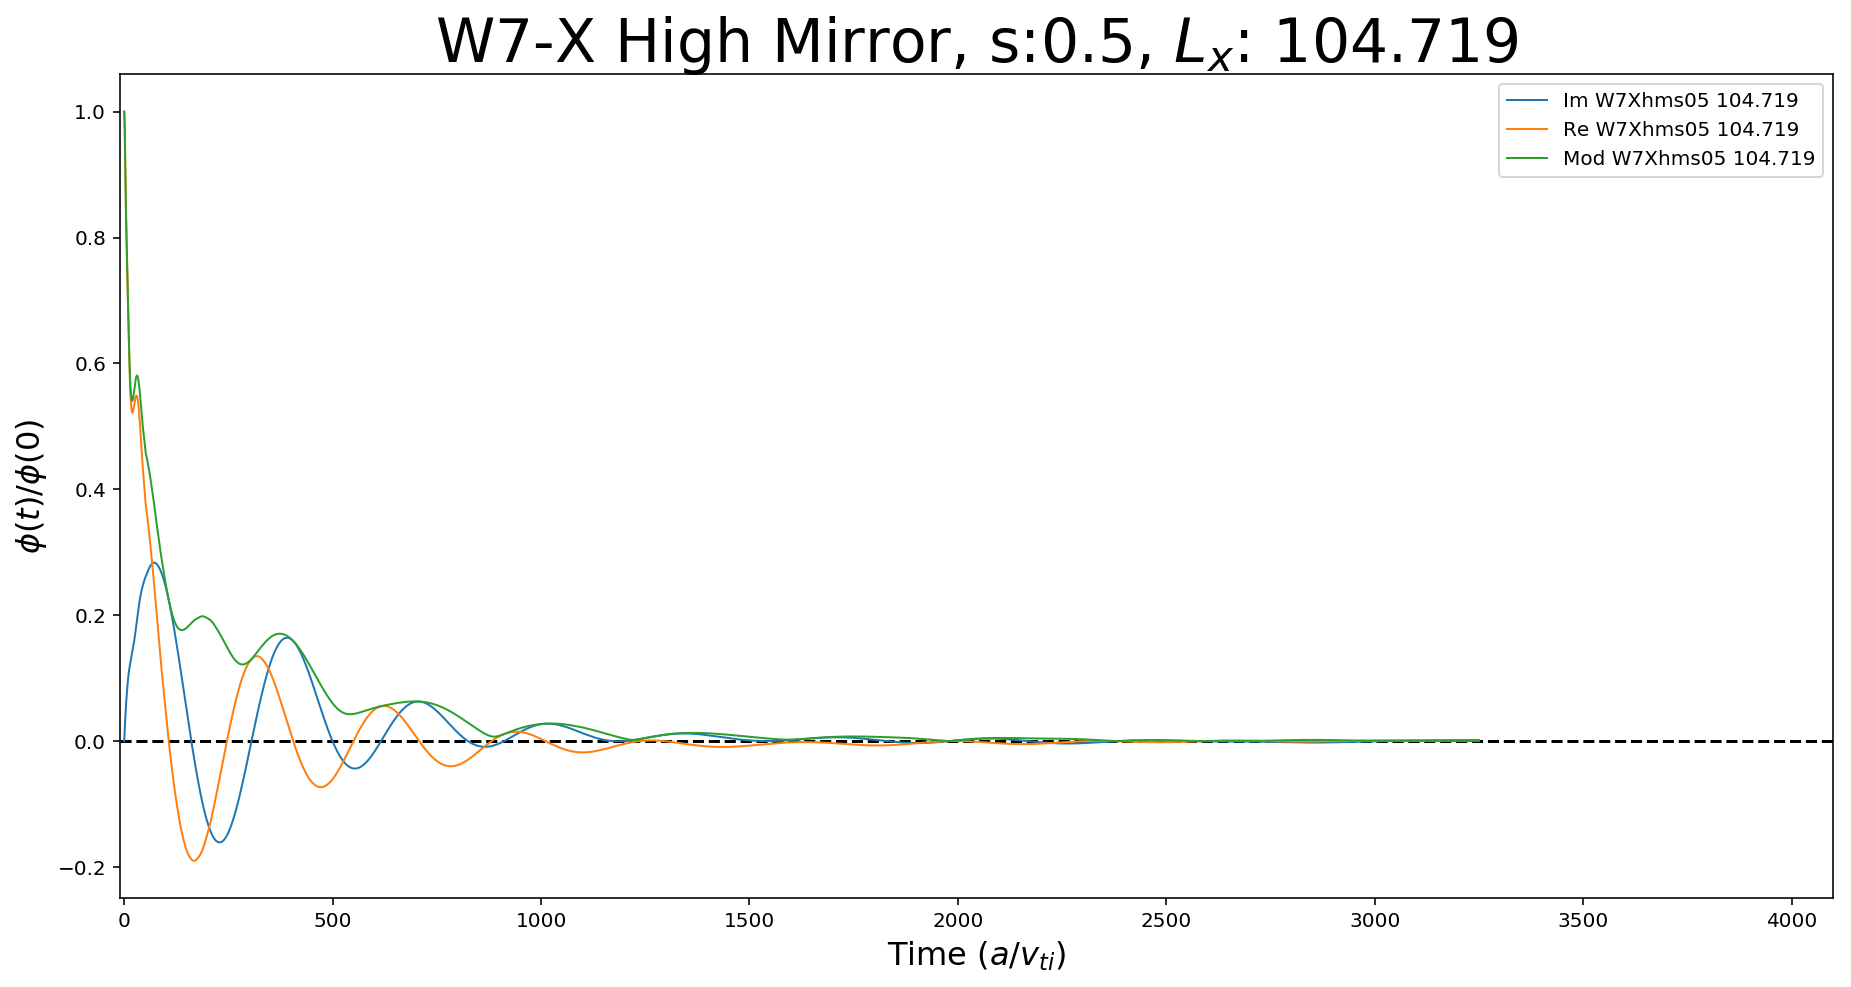

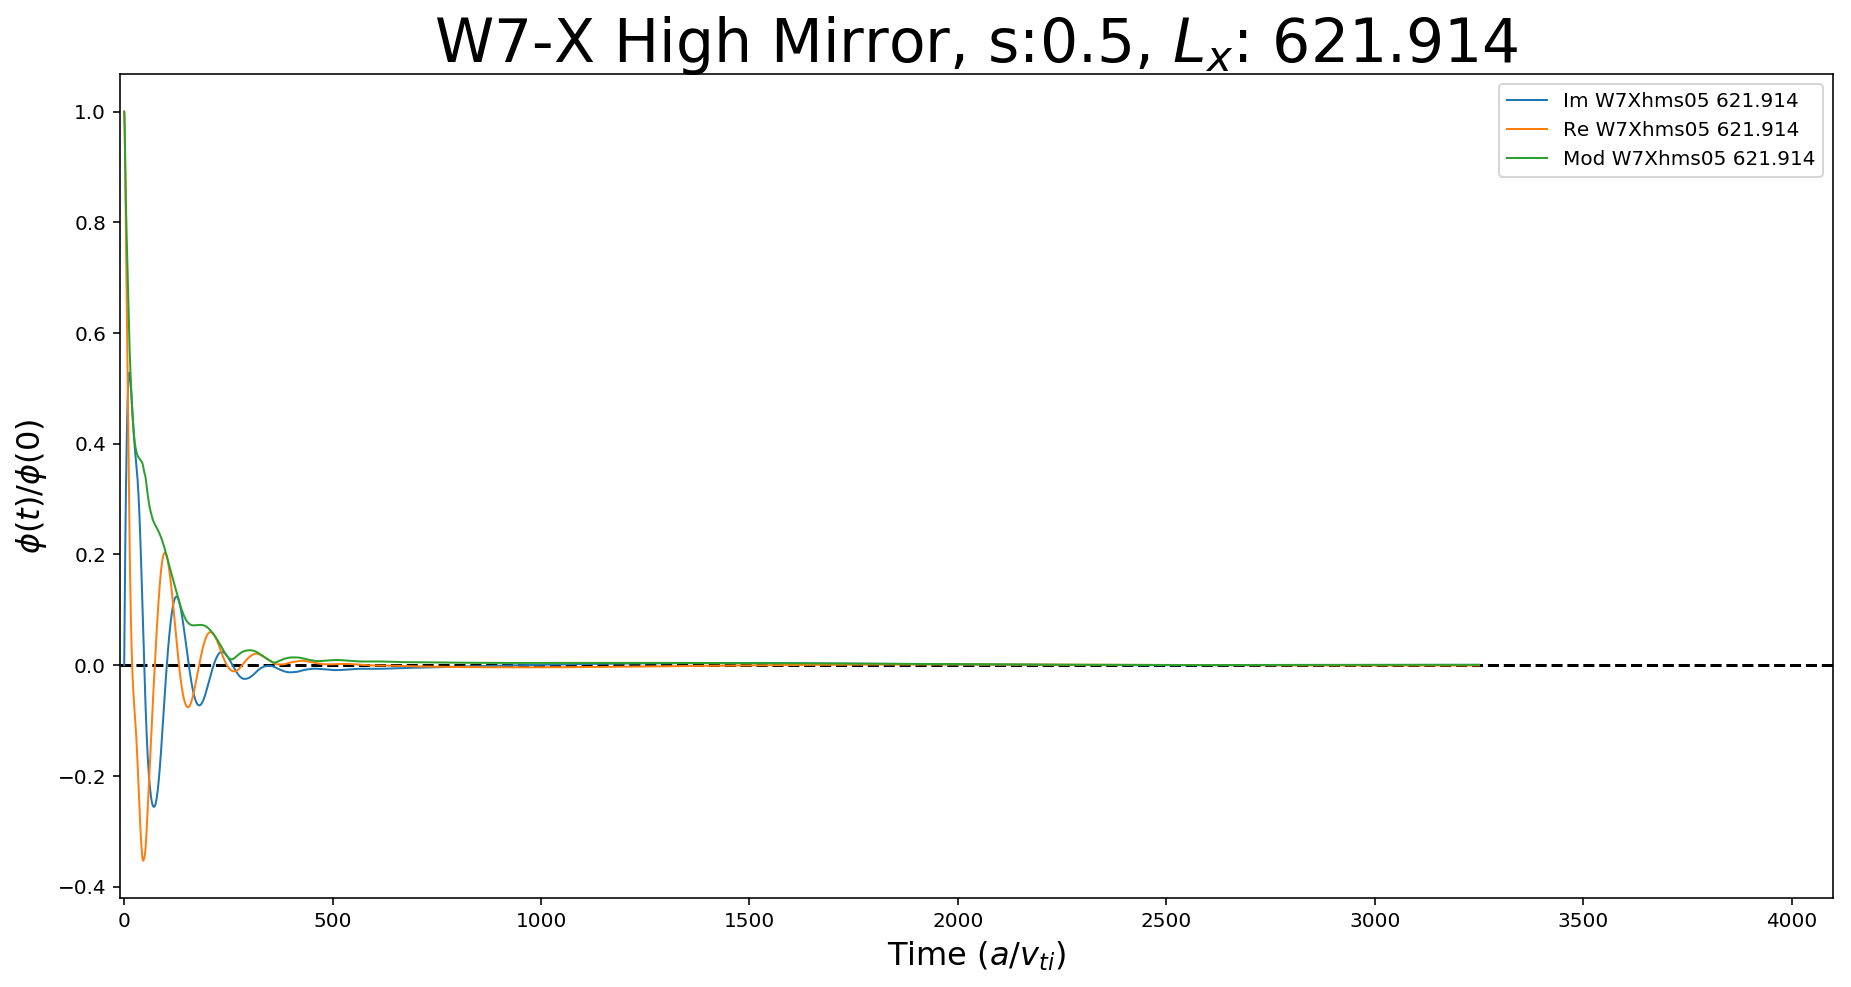

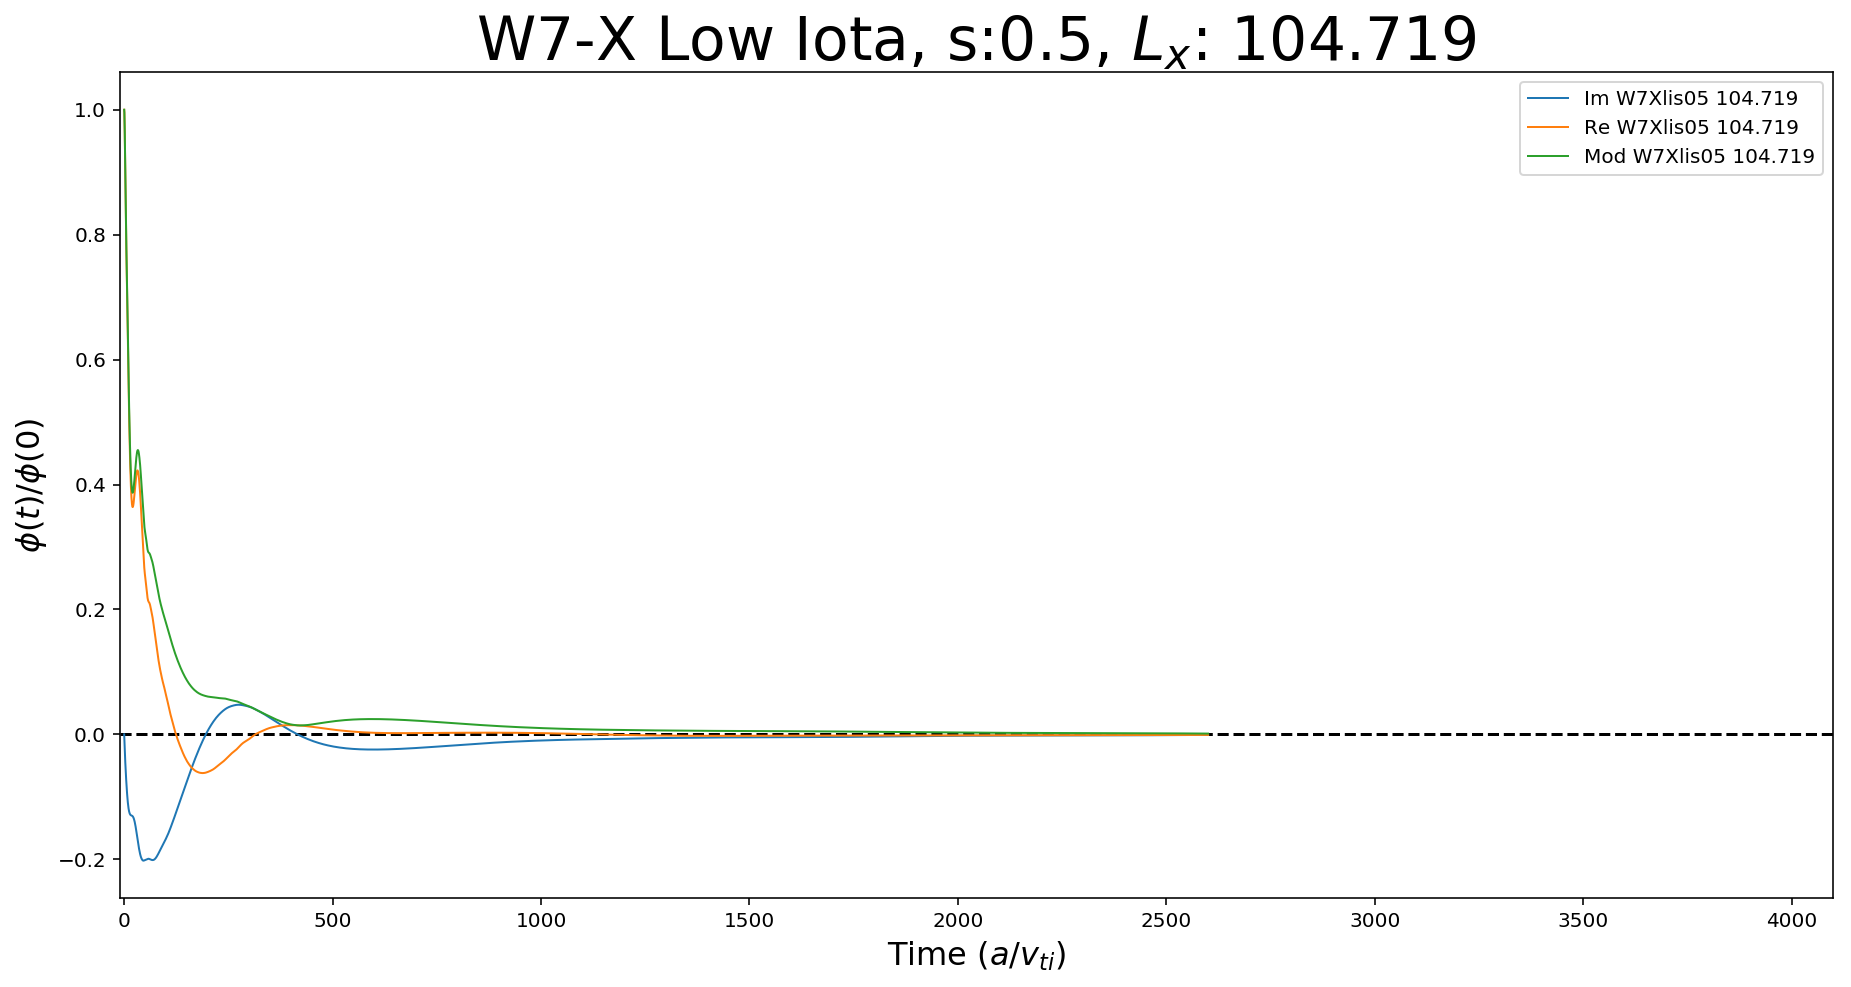

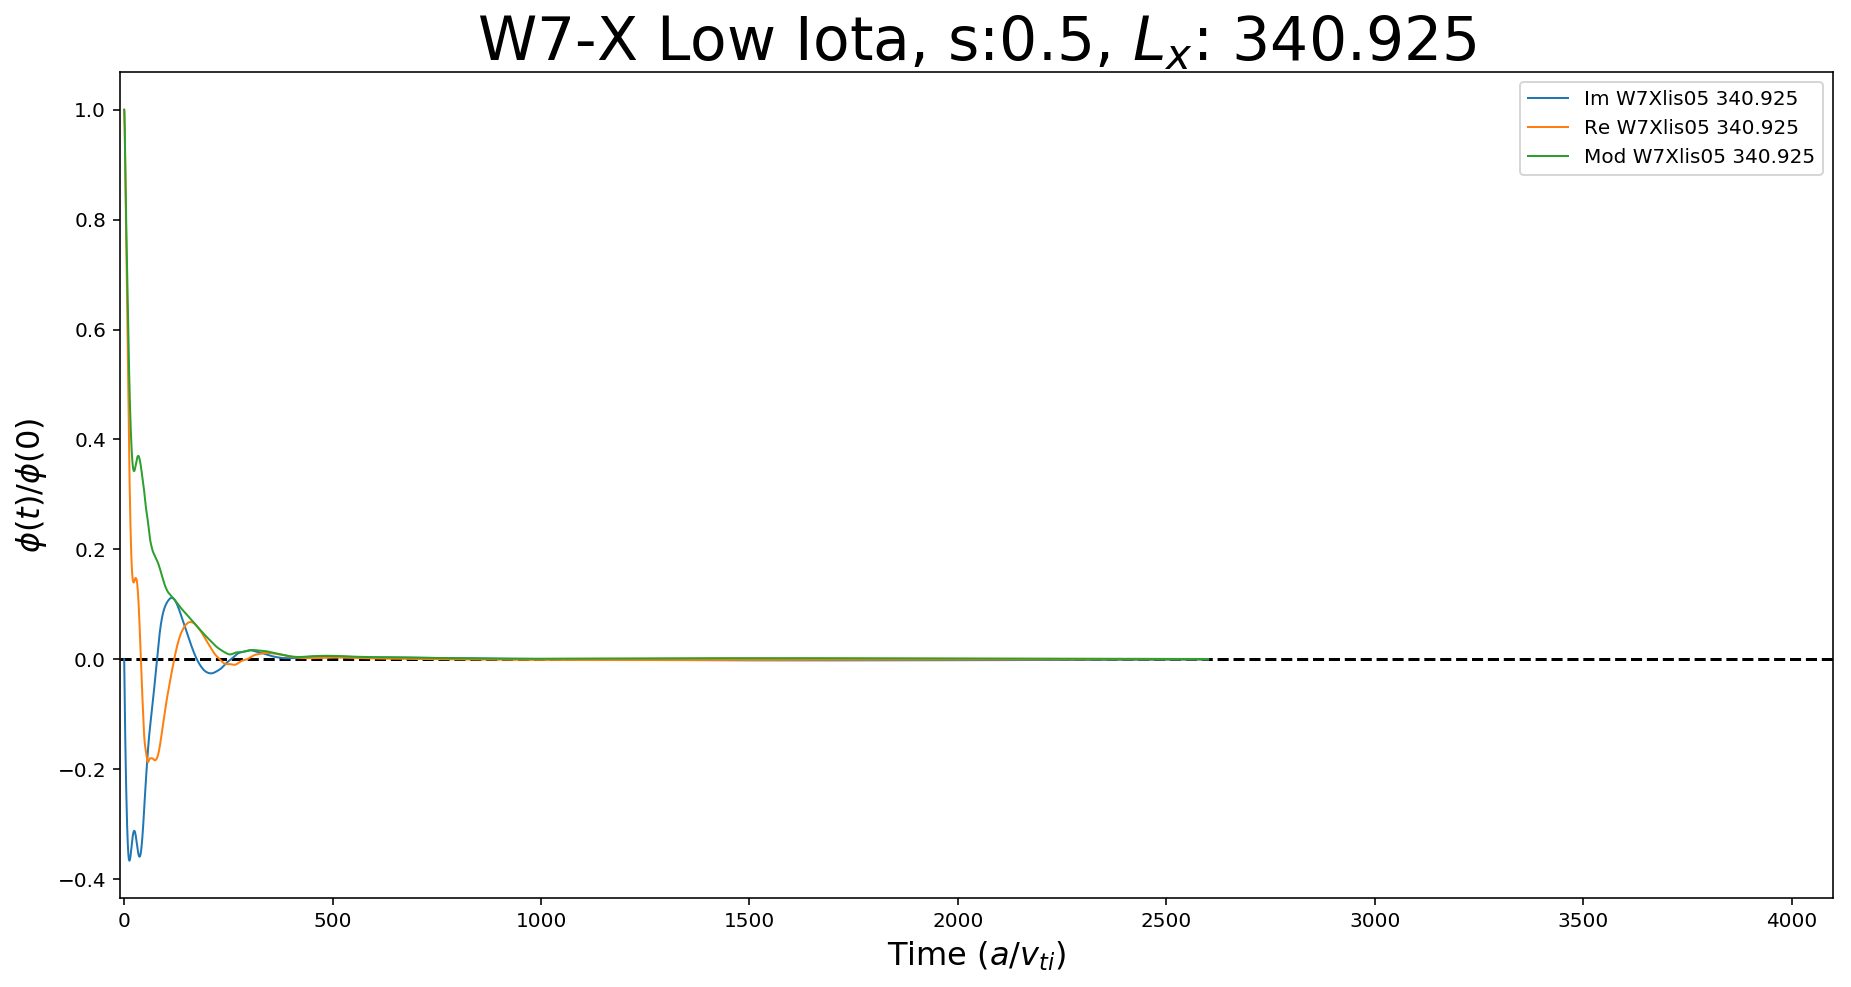

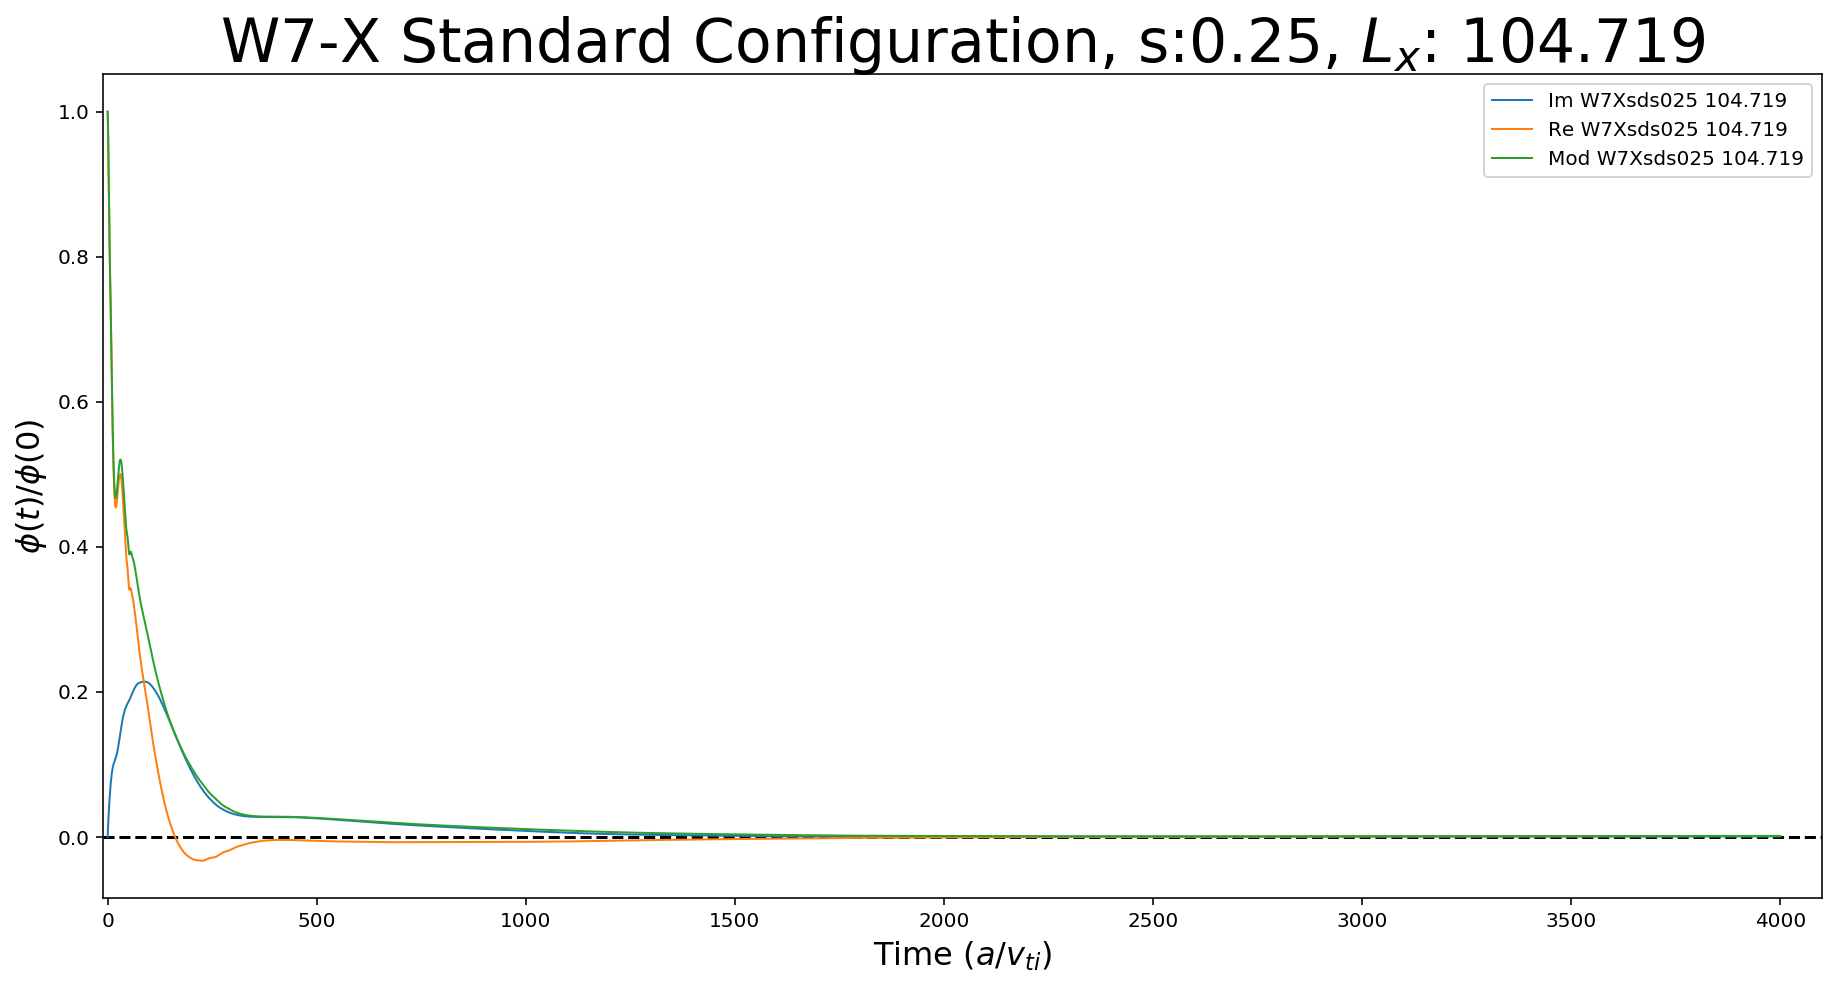

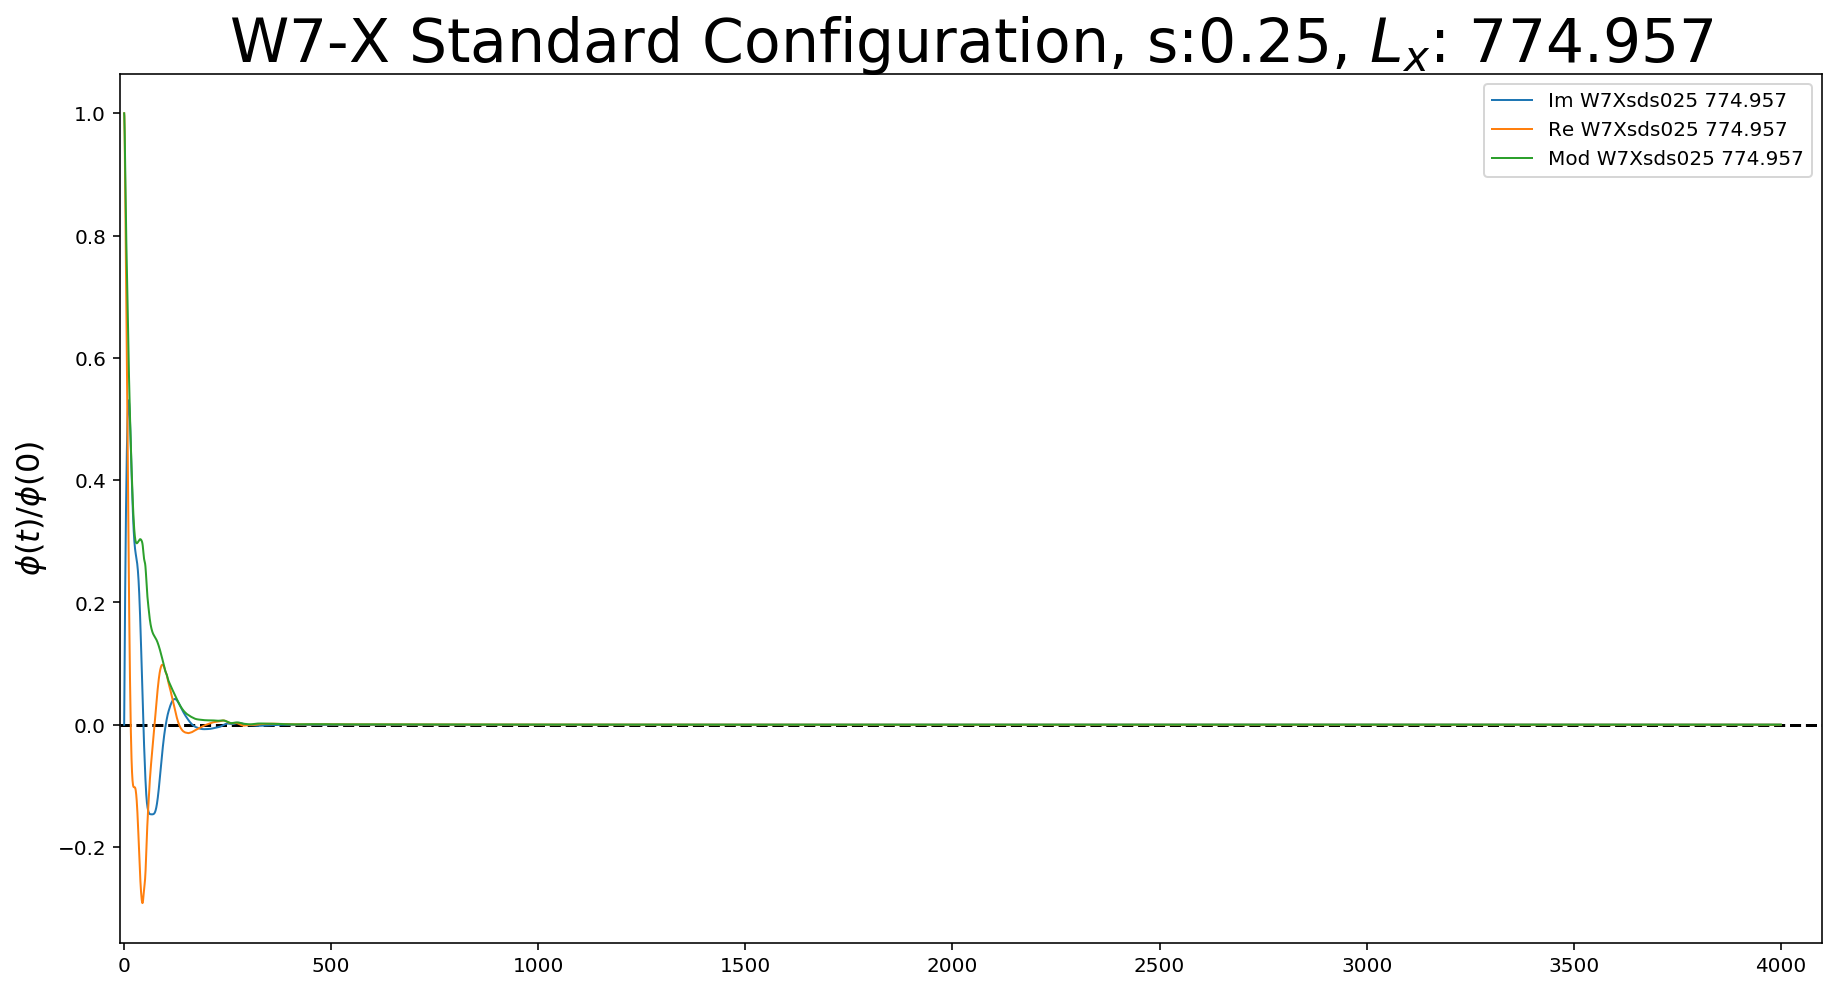

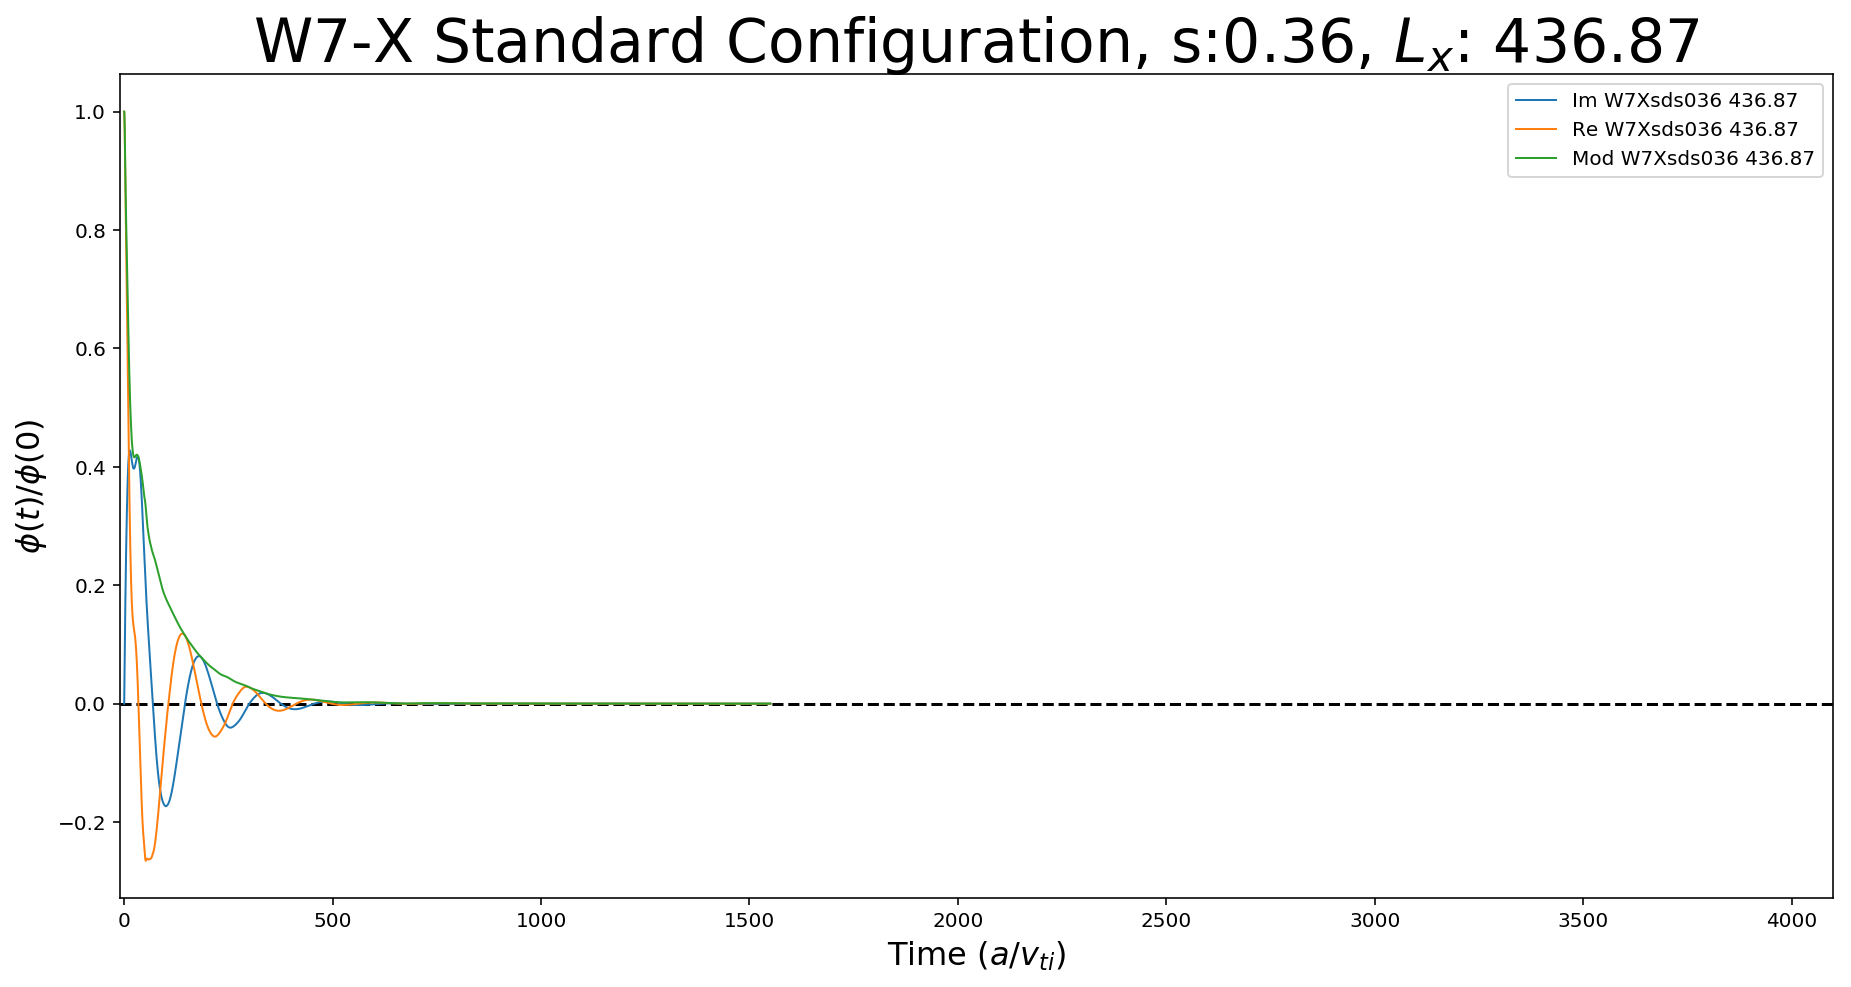

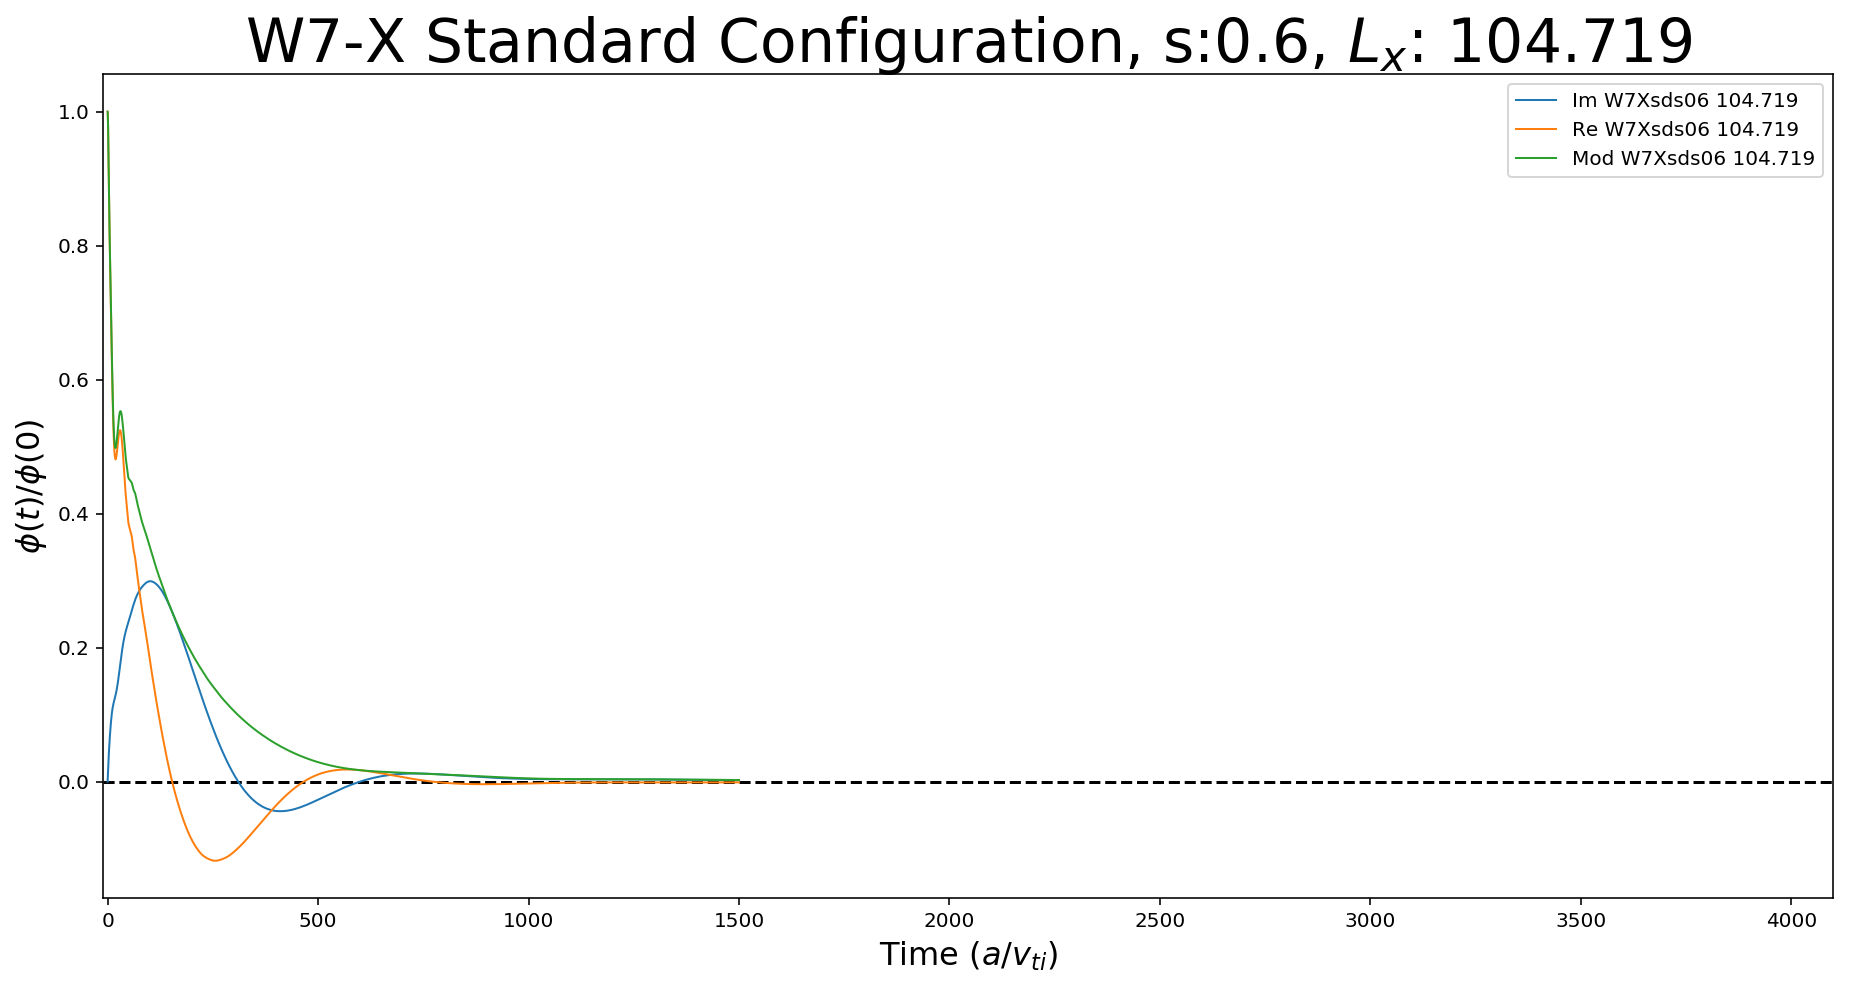

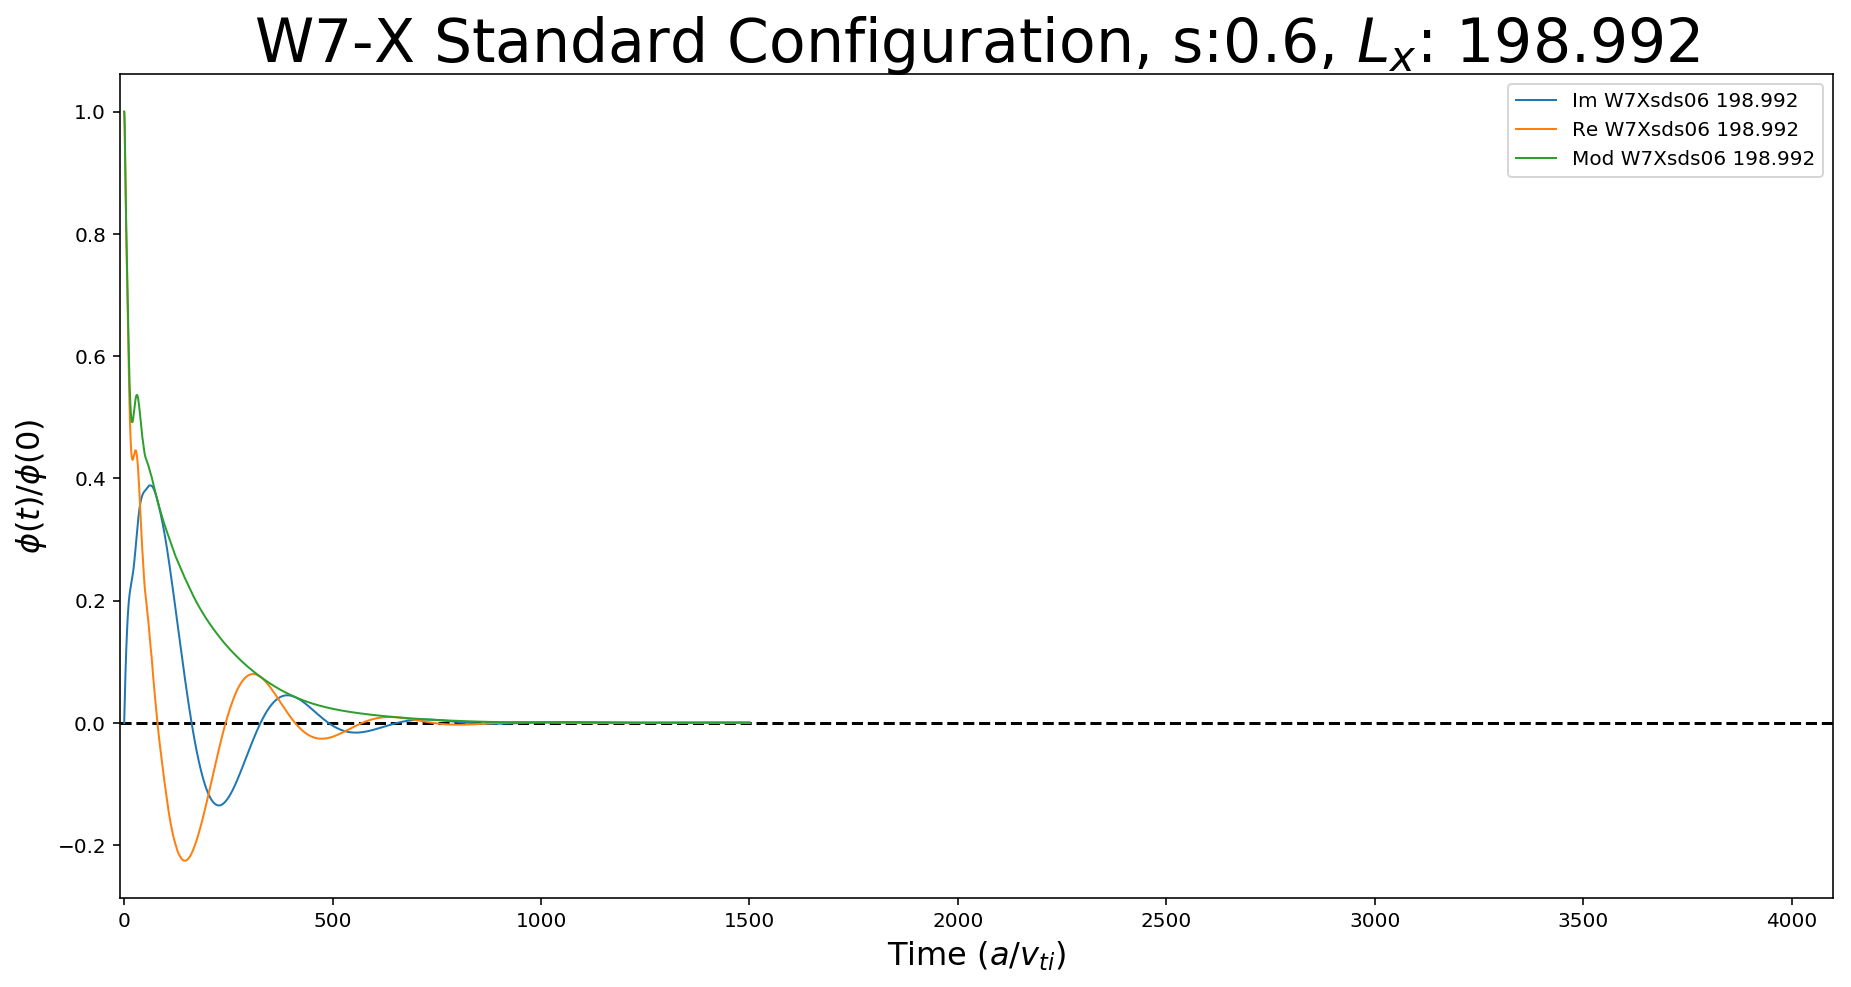

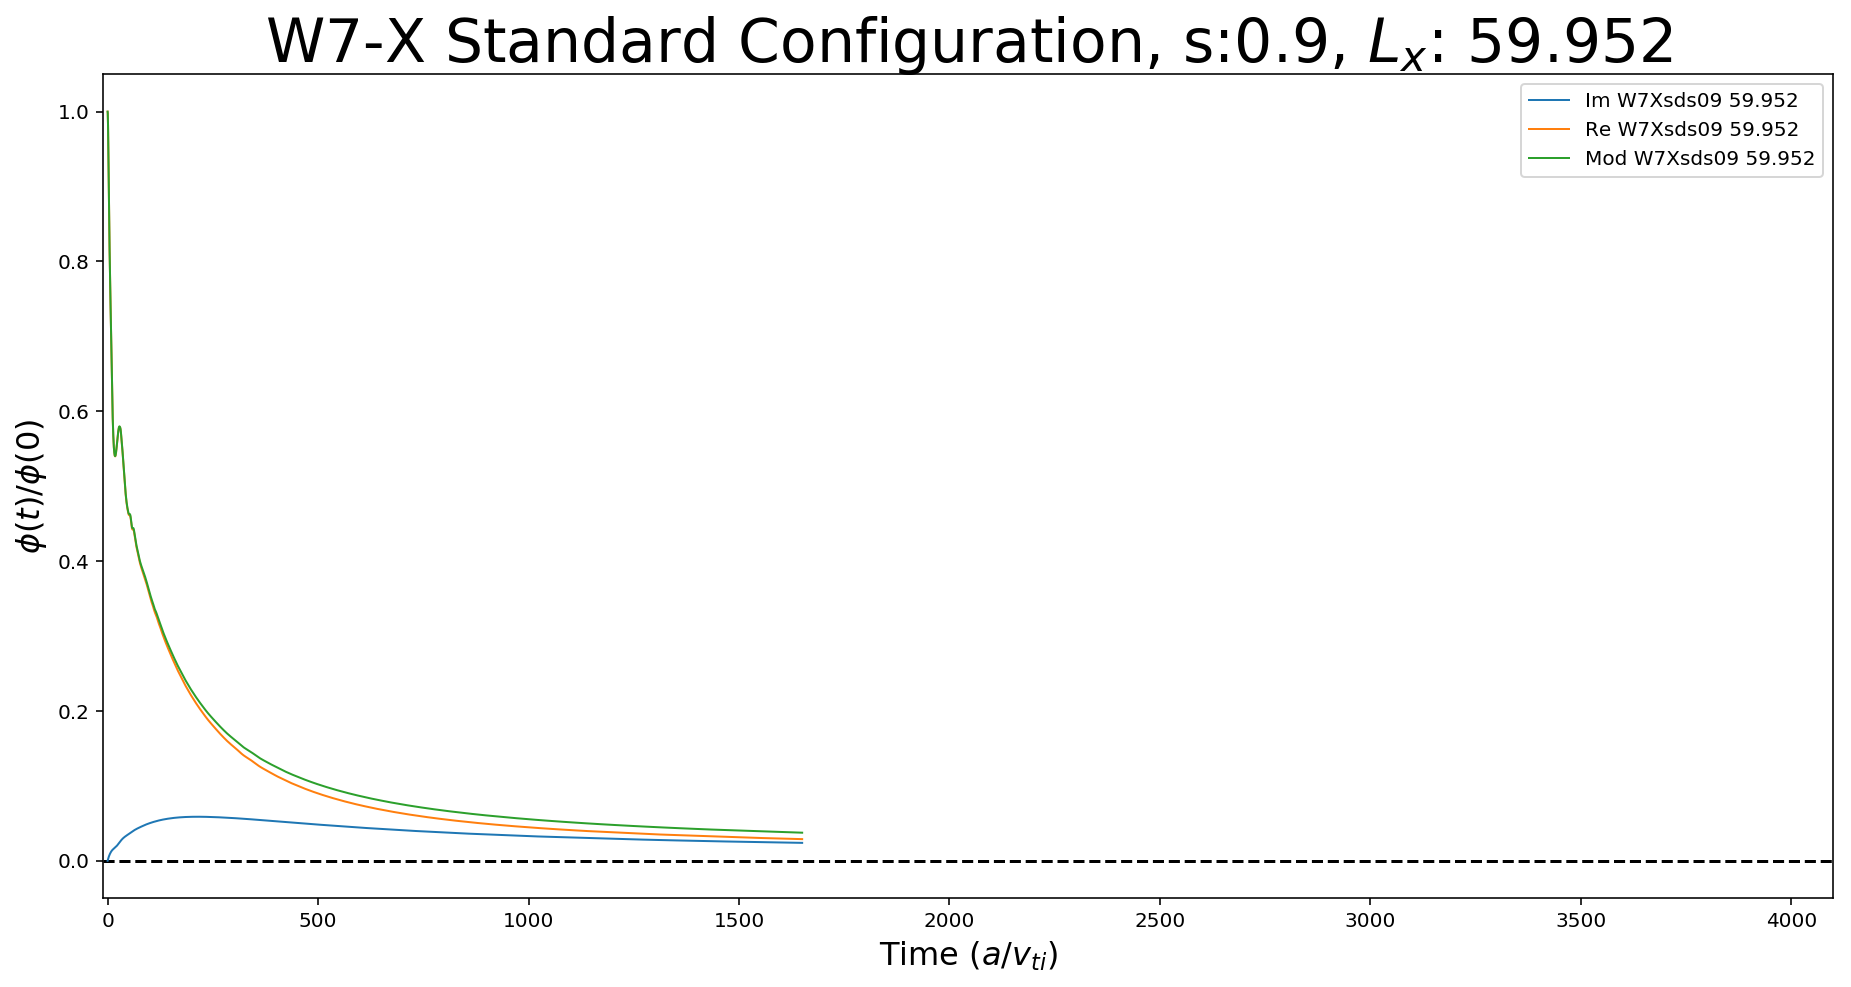

In [18]:
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])
#plt.ylim([0,0.1])

Q1 = np.sqrt(E1**2+e1**2)
ax1.plot(t1, e1, linewidth=1, label=('Im W7Xhis05 104.719'))
ax1.plot(t1, E1, linewidth=1, label=('Re W7Xhis05 104.719'))
ax1.plot(t1, Q1, linewidth=1, label=('Mod W7Xhis05 104.719'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xhis05_104719.pdf', format='pdf', dpi=1200)

fig, ax2 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota, s:0.5, $L_{x}$: 665.979', fontsize=30)
ax2.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax2.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax2.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q2 = np.sqrt(E2**2+e2**2)
ax2.plot(t2, e2, linewidth=1, label=('Im W7Xhis05 665.979'))
ax2.plot(t2, E2, linewidth=1, label=('Re W7Xhis05 665.979'))
ax2.plot(t2, Q2, linewidth=1, label=('Mod W7Xhis05 665.979'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xhis05_665979.pdf', format='pdf', dpi=1200)

fig, ax3 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax3.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax3.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax3.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q3 = np.sqrt(E3**2+e3**2)
ax3.plot(t3, e3, linewidth=1, label=('Im W7Xhms05 104.719'))
ax3.plot(t3, E3, linewidth=1, label=('Re W7Xhms05 104.719'))
ax3.plot(t3, Q3, linewidth=1, label=('Mod W7Xhms05 104.719'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xhms05_104719.pdf', format='pdf', dpi=1200)

fig, ax4 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.5, $L_{x}$: 621.914', fontsize=30)
ax4.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax4.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax4.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q4 = np.sqrt(E4**2+e4**2)
ax4.plot(t4, e4, linewidth=1, label=('Im W7Xhms05 621.914'))
ax4.plot(t4, E4, linewidth=1, label=('Re W7Xhms05 621.914'))
ax4.plot(t4, Q4, linewidth=1, label=('Mod W7Xhms05 621.914'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xhms05_621914.pdf', format='pdf', dpi=1200)

fig, ax5 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Low Iota, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax5.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax5.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax5.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q5 = np.sqrt(E5**2+e5**2)
ax5.plot(t5, e5, linewidth=1, label=('Im W7Xlis05 104.719'))
ax5.plot(t5, E5, linewidth=1, label=('Re W7Xlis05 104.719'))
ax5.plot(t5, Q5, linewidth=1, label=('Mod W7Xlis05 104.719'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xlis05_104719.pdf', format='pdf', dpi=1200)

fig, ax6 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Low Iota, s:0.5, $L_{x}$: 340.925', fontsize=30)
ax6.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax6.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax6.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q6 = np.sqrt(E6**2+e6**2)
ax6.plot(t6, e6, linewidth=1, label=('Im W7Xlis05 340.925'))
ax6.plot(t6, E6, linewidth=1, label=('Re W7Xlis05 340.925'))
ax6.plot(t6, Q6, linewidth=1, label=('Mod W7Xlis05 340.925'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xlis05_340925.pdf', format='pdf', dpi=1200)

fig, ax7 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.25, $L_{x}$: 104.719', fontsize=30)
ax7.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax7.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax7.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q7 = np.sqrt(E7**2+e7**2)
ax7.plot(t7, e7, linewidth=1, label=('Im W7Xsds025 104.719'))
ax7.plot(t7, E7, linewidth=1, label=('Re W7Xsds025 104.719'))
ax7.plot(t7, Q7, linewidth=1, label=('Mod W7Xsds025 104.719'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds025_104719.pdf', format='pdf', dpi=1200)

fig, ax8 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.25, $L_{x}$: 774.957', fontsize=30)
ax8.set_ylabel('Time ($a / v_{ti}$)',fontsize=16)
ax8.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax8.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q8 = np.sqrt(E8**2+e8**2)
ax8.plot(t8, e8, linewidth=1, label=('Im W7Xsds025 774.957'))
ax8.plot(t8, E8, linewidth=1, label=('Re W7Xsds025 774.957'))
ax8.plot(t8, Q8, linewidth=1, label=('Mod W7Xsds025 774.957'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds025_774957.pdf', format='pdf', dpi=1200)

fig, ax9 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.36, $L_{x}$: 436.87', fontsize=30)
ax9.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax9.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax9.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q9 = np.sqrt(E9**2+e9**2)
ax9.plot(t9, e9, linewidth=1, label=('Im W7Xsds036 436.87'))
ax9.plot(t9, E9, linewidth=1, label=('Re W7Xsds036 436.87'))
ax9.plot(t9, Q9, linewidth=1, label=('Mod W7Xsds036 436.87'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds036_43687.pdf', format='pdf', dpi=1200)

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#fig, ax10 = plt.subplots(figsize=(13, 7))
#plt.title('W7-X Standard Configuration, s:0.5, $L_{x}$: 104.719', fontsize=30)
#ax10.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
#ax10.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
#ax10.axhline(y=0, color='black', linestyle='dashed')
#plt.xlim([-10,3000])
#
#Q10 = np.sqrt(E10**2+e10**2)
#ax10.plot(t10, e10, linewidth=1, label=('Im W7Xsds05 104.719'))
#ax10.plot(t10, E10, linewidth=1, label=('Re W7Xsds05 104.719'))
#ax10.plot(t10, Q10, linewidth=1, label=('Mod W7Xsds05 104.719'))
#plt.legend()
#fig.tight_layout()
#plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds05_104719.pdf', format='pdf', dpi=1200)
#
#fig, ax11 = plt.subplots(figsize=(13, 7))
#plt.title('W7-X Standard Configuration, s:0.5, $L_{x}$: 621.914', fontsize=30)
#ax11.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
#ax11.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
#ax11.axhline(y=0, color='black', linestyle='dashed')
#plt.xlim([-10,3000])
#
#Q11 = np.sqrt(E11**2+e11**2)
#ax11.plot(t11, e11, linewidth=1, label=('Im W7Xsds05 621.914'))
#ax11.plot(t11, E11, linewidth=1, label=('Re W7Xsds05 621.914'))
#ax11.plot(t11, Q11, linewidth=1, label=('Mod W7Xsds05 621.914'))
#plt.legend()
#fig.tight_layout()
#plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds05_621914.pdf', format='pdf', dpi=1200)

fig, ax12 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.6, $L_{x}$: 104.719', fontsize=30)
ax12.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax12.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax12.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q12 = np.sqrt(E12**2+e12**2)
ax12.plot(t12, e12, linewidth=1, label=('Im W7Xsds06 104.719'))
ax12.plot(t12, E12, linewidth=1, label=('Re W7Xsds06 104.719'))
ax12.plot(t12, Q12, linewidth=1, label=('Mod W7Xsds06 104.719'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds06_104719.pdf', format='pdf', dpi=1200)

fig, ax13 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.6, $L_{x}$: 198.992', fontsize=30)
ax13.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax13.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax13.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q13 = np.sqrt(E13**2+e13**2)
ax13.plot(t13, e13, linewidth=1, label=('Im W7Xsds06 198.992'))
ax13.plot(t13, E13, linewidth=1, label=('Re W7Xsds06 198.992'))
ax13.plot(t13, Q13, linewidth=1, label=('Mod W7Xsds06 198.992'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds06_198992.pdf', format='pdf', dpi=1200)

fig, ax14 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.9, $L_{x}$: 59.952', fontsize=30)
ax14.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax14.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax14.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])

Q14 = np.sqrt(E14**2+e14**2)
ax14.plot(t14, e14, linewidth=1, label=('Im W7Xsds09 59.952'))
ax14.plot(t14, E14, linewidth=1, label=('Re W7Xsds09 59.952'))
ax14.plot(t14, Q14, linewidth=1, label=('Mod W7Xsds09 59.952'))
plt.legend()
fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xsds09_59952.pdf', format='pdf', dpi=1200)

In [3]:
#determining the residual values
#Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data
n1=0
teller1=0 #teller = counter
residual1=0
nfix1=0 # needed to make sure it avegares only over the right Q values
finalvaluedata1=9538 #needs to be adjusted per data set
while n1 < finalvaluedata1:
    if abs((Q1[n1+1]-Q1[n1])/(t1[n1+1]-t1[n1])) < 0.00001:#this number justified because the values that come out of this code are in the same order as estimated values by looking at the residual closely.
        teller1=teller1+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual1=(residual1*(n1-nfix1)+Q1[n1])/(n1+1-nfix1) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller1=0
        residual1=0
        nfix1 = (n1+1)
    n1=n1+1 
listofqvalues1=Q1[(n1-teller1):n1]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std1=np.std(listofqvalues1)
print("The residual value of W7Xhis05 104.719  is:",residual1, "+-", std1)

n2=0
teller2=0
residual2=0
nfix2=0
finalvaluedata2=9538 
while n2 < finalvaluedata2:
    if abs((Q2[n2+1]-Q2[n2])/(t2[n2+1]-t2[n2])) < 0.00001:
        teller2=teller2+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual2=(residual2*(n2-nfix2)+Q2[n2])/(n2+1-nfix2) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller2=0
        residual2=0
        nfix2=(n2+1)
    n2=n2+1    
listofqvalues2=Q2[(n2-teller2):n2]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std2=np.std(listofqvalues2)
print("The residual value of W7Xhis05 665.979  is:",residual2, "+-", std2)

n3=0
teller3=0
residual3=0
nfix3=0
finalvaluedata3=8784
while n3 < finalvaluedata3:
    if abs((Q3[n3+1]-Q3[n3])/(t3[n3+1]-t3[n3])) < 0.00001:
        teller3=teller3+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual3=(residual3*(n3-nfix3)+Q3[n3])/(n3+1-nfix3) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller3=0
        residual3=0
        nfix3=n3+1
    n3=n3+1 
listofqvalues3=Q3[(n3-teller3):n3]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std3=np.std(listofqvalues3)
print("The residual value of W7Xhms05 104.719  is:",residual3, "+-", std3)

n4=0
teller4=0
residual4=0
nfix4=0
finalvaluedata4=8784 
while n4 < finalvaluedata4:
    if abs((Q4[n4+1]-Q4[n4])/(t4[n4+1]-t4[n4])) < 0.00001:
        teller4=teller4+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual4=(residual4*(n4-nfix4)+Q4[n4])/(n4+1-nfix4) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller4=0
        residual4=0
        nfix4=n4+1
    n4=n4+1    
listofqvalues4=Q4[(n4-teller4):n4]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std4=np.std(listofqvalues4)
print("The residual value of W7Xhms05 621.914  is:",residual4, "+-", std4)

n5=0
teller5=0
residual5=0
nfix5=0
finalvaluedata5=5990 
while n5 < finalvaluedata5:
    if abs((Q5[n5+1]-Q5[n5])/(t5[n5+1]-t5[n5])) < 0.00001:
        teller5=teller5+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual5=(residual5*(n5-nfix5)+Q5[n5])/(n5+1-nfix5) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller5=0
        residual5=0
        nfix5=n5+1
    n5=n5+1    
listofqvalues5=Q5[(n5-teller5):n5]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std5=np.std(listofqvalues5)
print("The residual value of W7Xlis05 104.719  is:",residual5, "+-", std5)

n6=0
teller6=0
residual6=0
nfix6=0
finalvaluedata6=5990 
while n6 < finalvaluedata6:
    if abs((Q6[n6+1]-Q6[n6])/(t6[n6+1]-t6[n6])) < 0.00001:
        teller6=teller6+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual6=(residual6*(n6-nfix6)+Q6[n6])/(n6+1-nfix6) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller6=0
        residual6=0
        nfix6=n6+1
    n6=n6+1    
listofqvalues6=Q6[(n6-teller6):n6]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std6=np.std(listofqvalues6)
print("The residual value of W7Xlis05 340.925  is:",residual6, "+-", std6)

n7=0
teller7=0
residual7=0
nfix7=0
finalvaluedata7=9949 
while n7 < finalvaluedata7:
    if abs((Q7[n7+1]-Q7[n7])/(t7[n7+1]-t7[n7])) < 0.00001:
        teller7=teller7+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual7=(residual7*(n7-nfix7)+Q7[n7])/(n7+1-nfix7) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller7=0
        residual7=0
        nfix7=n7+1
    n7=n7+1    
listofqvalues7=Q7[(n7-teller7):n7]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std7=np.std(listofqvalues7)
print("The residual value of W7Xsds025 104.719 is:",residual7, "+-", std7)

n8=0
teller8=0
residual8=0
nfix8=0
finalvaluedata8=9900 
while n8 < finalvaluedata8:
    if abs((Q8[n8+1]-Q8[n8])/(t8[n8+1]-t8[n8])) < 0.00001:
        teller8=teller8+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual8=(residual8*(n8-nfix8)+Q8[n8])/(n8+1-nfix8) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller8=0
        residual8=0
        nfix8=n8+1
    n8=n8+1    
listofqvalues8=Q8[(n8-teller8):n8]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std8=np.std(listofqvalues8)
print("The residual value of W7Xsds025 774.957 is:",residual8, "+-", std8)

n9=0
teller9=0
residual9=0
nfix9=0
finalvaluedata9=3933 
while n9 < finalvaluedata9:
    if abs((Q9[n9+1]-Q9[n9])/(t9[n9+1]-t9[n9])) < 0.00001:
        teller9=teller9+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual9=(residual9*(n9-nfix9)+Q9[n9])/(n9+1-nfix9) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller9=0
        residual9=0
        nfix9=n9+1
    n9=n9+1    
listofqvalues9=Q9[(n9-teller9):n9]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std9=np.std(listofqvalues9)
print("The residual value of W7Xsds036  436.87 is:",residual9, "+-", std9)

n12=0
teller12=0
residual12=0
nfix12=0
finalvaluedata12=4075
while n12 < finalvaluedata12:
    if abs((Q12[n12+1]-Q12[n12])/(t12[n12+1]-t12[n12])) < 0.00001:
        teller12=teller12+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual12=(residual12*(n12-nfix12)+Q12[n12])/(n12+1-nfix12) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller12=0
        residual12=0
        nfix12=n12+1
    n12=n12+1    
listofqvalues12=Q12[(n12-teller12):n12]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std12=np.std(listofqvalues12)
print("The residual value of W7Xsds06  104.719 is:",residual12, "+-", std12)

n13=0
teller13=0
residual13=0
nfix13=0
finalvaluedata13=4054 
while n13 < finalvaluedata13:
    if abs((Q13[n13+1]-Q13[n13])/(t13[n13+1]-t13[n13])) < 0.00001:
        teller13=teller13+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual13=(residual13*(n13-nfix13)+Q13[n13])/(n13+1-nfix13) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller13=0
        residual13=0
        nfix12=n13+1
    n13=n13+1    
listofqvalues13=Q13[(n13-teller13):n13]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std13=np.std(listofqvalues13)
print("The residual value of W7Xsds06  198.992 is:",residual13, "+-", std13)

#bigger derivatives taken into account
n14=0
teller14=0
residual14=0
nfix14=0
finalvaluedata14=4882 
while n14 < finalvaluedata14:
    if abs((Q14[n14+1]-Q14[n14])/(t14[n14+1]-t14[n14])) < 0.0001:
        teller14=teller14+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual14=(residual14*(n14-nfix14)+Q14[n14])/(n14+1-nfix14) #to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else: 
        teller14=0
        residual14=0
        nfix14=n14+1
    n14=n14+1    
listofqvalues14=Q14[(n14-teller14):n14]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std14=np.std(listofqvalues14)
print("The residual value of W7Xsds09   59.952 is:",residual14, "+-",std14)

The residual value of W7Xhis05 104.719  is: 0.0018883745765866926 +- 0.0015989038842195028
The residual value of W7Xhis05 665.979  is: 9.609050280284986e-05 +- 4.446289157150347e-05
The residual value of W7Xhms05 104.719  is: 0.001298210115928011 +- 0.00029161683966651304
The residual value of W7Xhms05 621.914  is: 0.002059967473683929 +- 0.0015654634373006373
The residual value of W7Xlis05 104.719  is: 0.0036882616428096484 +- 0.0016116938550509866
The residual value of W7Xlis05 340.925  is: 0.0015235041741223335 +- 0.00048202447465888344
The residual value of W7Xsds025 104.719 is: 0.0011865967102775076 +- 0.0008682133266640964
The residual value of W7Xsds025 774.957 is: 0.00013761199215413738 +- 0.00011236580278308385
The residual value of W7Xsds036  436.87 is: 0.00020634652859134454 +- 0.0001274755924026819
The residual value of W7Xsds06  104.719 is: 0.003293247231550367 +- 0.0004218456249291847
The residual value of W7Xsds06  198.992 is: 0.00031723343911342064 +- 0.0002989950303299

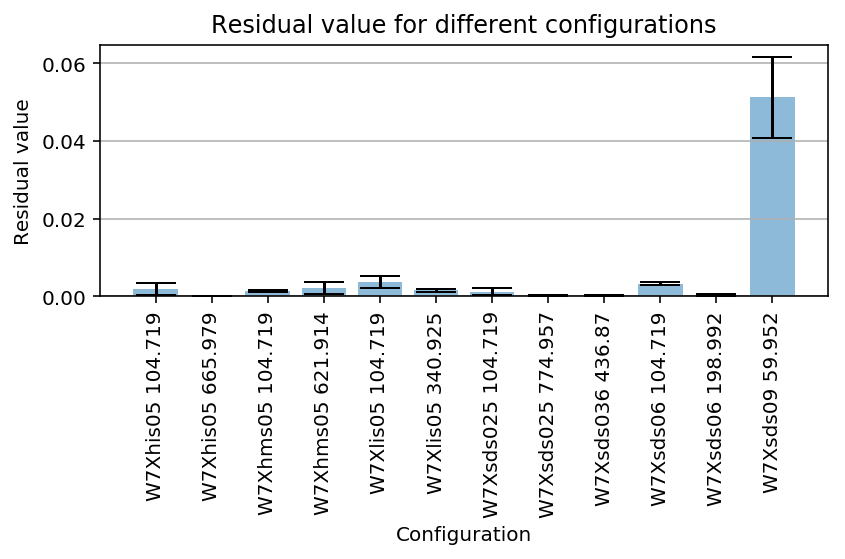

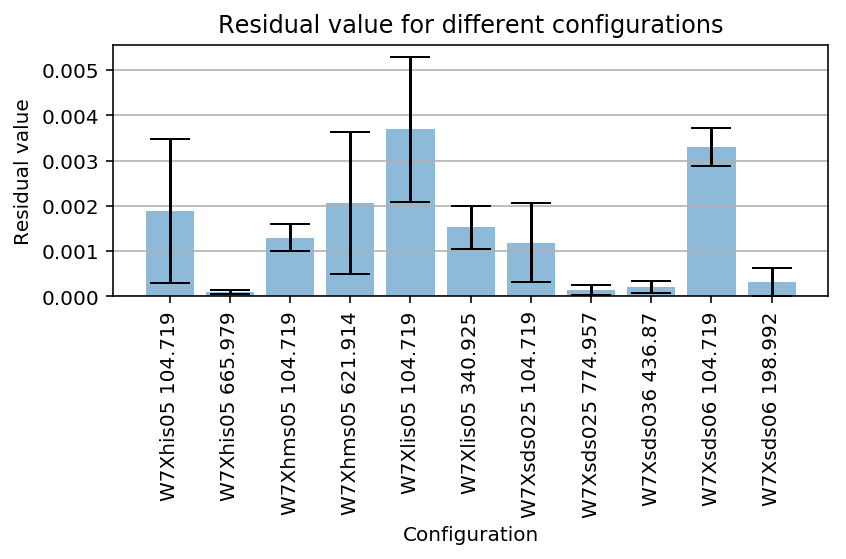

In [27]:
configuration = ['W7Xhis05 104.719','W7Xhis05 665.979','W7Xhms05 104.719','W7Xhms05 621.914','W7Xlis05 104.719','W7Xlis05 340.925','W7Xsds025 104.719','W7Xsds025 774.957','W7Xsds036 436.87','W7Xsds06 104.719','W7Xsds06 198.992','W7Xsds09 59.952']
residualvalue = [residual1,residual2,residual3,residual4,residual5,residual6,residual7,residual8,residual9,residual12,residual13,residual14]
error = [std1,std2,std3,std4,std5,std6,std7,std8,std9,std12,std13,std14]
fig, ax = plt.subplots()
ax.bar(configuration, residualvalue, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Residual value')
ax.set_xlabel('Configuration')
ax.set_xticks(configuration)
ax.set_xticklabels(configuration,rotation=90)
ax.set_title('Residual value for different configurations')
ax.yaxis.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/barplotresidual_w_sds09.pdf', format='pdf', dpi=1400)

#without W7Xsds09 59.952, since that ons deviates too much to be able to compare the rest
configuration = ['W7Xhis05 104.719','W7Xhis05 665.979','W7Xhms05 104.719','W7Xhms05 621.914','W7Xlis05 104.719','W7Xlis05 340.925','W7Xsds025 104.719','W7Xsds025 774.957','W7Xsds036 436.87','W7Xsds06 104.719','W7Xsds06 198.992']
residualvalue = [residual1,residual2,residual3,residual4,residual5,residual6,residual7,residual8,residual9,residual12,residual13]
error = [std1,std2,std3,std4,std5,std6,std7,std8,std9,std12,std13]
fig, ax = plt.subplots()
ax.bar(configuration, residualvalue, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Residual value')
ax.set_xlabel('Configuration')
ax.set_xticks(configuration)
ax.set_xticklabels(configuration,rotation=90)
ax.set_title('Residual value for different configurations')
ax.yaxis.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/barplotresidual_wo_sds09.pdf', format='pdf', dpi=1400)